# Predicting students Grade Average

## Student name and details 
Darren Huang (S3755729)<br>
Joshua Barry (S3718861)
## Group Name 
Pine Cone Ice Man

## Table of Contents
- [Introduction](#introduction)
- [Target Features](#targetfeatures)
- [Descriptive Features](#describefeatures)
- [Importing libraries](#imports)
- [Reading dataset](#reading)
- [Data Preparation](#preparation)
    - [Checking for ID Column](#checkidcolumn)
    - [Checking for constant features](#checkconstantfeature)
    - [Checking for redundant features](#checkredundantfeature)
    - [Checking for date and time features](#checkdatetimefeature)
    - [Checking for irrelevant features](#checkirrelevantfeature)
    - [Looking at Feature Selection](#featureselection)
    - [Correlations](#correlations)
- [Cleaning data](#cleaningdata)
- [Data Exploration](#exploration)
    - [One-Variable plots](#oneplot)
    - [Two-Variable plots](#twoplot)
    - [Summary](#explorationsummary)
- [Data Modelling](#datamodelling)
    - [Full model](#fullmodel)
    - [Reduced Model](#reducedmodel)  
- [Summary and Conclusions](#conclusion)
- [References](#references)

## Introduction <a name="introduction"></a>

The objective of our project was to find the different factors that impact students grade average and to create a model that can be used to predict a students grade average given these variables. We are using grade average which derrived from the students performance over 3 prior assessments. We are using a dataset which contains information about students studying Portugese and various pieces of background information about them. We use this background information to build a predictive model and explore the features that are found to have the greatest impact on the grade average, more detail on this later.

## Overview <a name="overview"></a>

### Data Source
The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/student+performance

Our data set is from the UCI Machine Learning Repository which is contains a multitude of datasets which can be used for machine learning and data analytical purposes. The datasource prodides us with 2 different datasets of Portugese Highschool students, one for students studying Portugese and one for students who are studying Mathematics. The data collected was found through the use of questionaires and student reports. The data collected is from the 2005 - 2006 school years in Portugul from 2 public schools. The data set of students taking Portugese contains 649 entries, relatively low by machine learning standards but has allowed us to see some trends that are emerging. 

### Citation 
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

## Project Objective

Our goal for this assignment is to predict a students grade average (GA) within an acceptable margin of error using multple linear regression. 

## Target Features<a name = "targetfeatures"></a>

- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - third period grade (numeric: from 0 to 20)

- GA - Grade average (numeric: from 0 to 20)

Initially for our target feature we were going to use `G3`. The issue with this is that if we were to predict only G3 we would be able to use the results from G1 and G2. Because of this it was decided that this would be far less useful than having the ability to be able to predict how a student will perform overall without any prior academic data on a given student. 

Our target feature is `GA` grade average which is done through a calculation of G1 G2 and G3 which are the results of 3 different assessments taken by students in respective order through out the semester. Our target variable is a continuous numerical feature giving us a regression problem for our project. This was chosen as it would allow us to see how background factors affect a students academic performance and whether or not we can use these factors to determine how well a student will perform in terms of `GA`. 

Because our target feature `GA` is derrived from `G1`, `G2` and `G3` we have also listed these as our target features. 

## Descriptive Features <a name = "describefeatures"></a>

- 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- 2 sex - student's sex (binary: "F" - female or "M" - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: "U" - urban or "R" - rural)
- 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
- 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- 12 guardian - student's guardian (nominal: "mother", "father" or "other")
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)



---

# Importing libraries<a name = "imports"></a>

In [1]:
#Pandas import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Data Modelling
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

# Ignore warnings
import warnings
###
warnings.filterwarnings('ignore')
###

We are reading the dataset from a locally stored CSV file containing the set of Portugese students studying Portugese. 

## Reading dataset<a name = "reading"></a>

In [2]:
# Display full size of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
pordf = pd.read_csv("Pine_Cone_Ice_Man_Data.csv", sep = ";")

In [4]:
pordf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
# Setting a variable to hold the total number of features
numberOfFeatures = len(pordf.columns) - 1 # 1 target feature, which is G3

In [6]:
pordf.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

---

## Data Preparation<a name = "preparation"></a>

To begin, we shall check for any data errors, i.e. extra whitespaces or mistakes in spelling that causes more unique data...<br>
We also used feature selection, more information can be seen below.

### Checking for ID Column<a name = "checkidcolumn"></a>

In [7]:
pordf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Dataset doesnt have ID Column.

### Checking for constant features<a name = "checkconstantfeature"></a>

In [8]:
for i in range(numberOfFeatures):
    colName = pordf.columns[i]
    print("Number of Unique values for " + colName + ": ", pordf[colName].nunique())

Number of Unique values for school:  2
Number of Unique values for sex:  2
Number of Unique values for age:  8
Number of Unique values for address:  2
Number of Unique values for famsize:  2
Number of Unique values for Pstatus:  2
Number of Unique values for Medu:  5
Number of Unique values for Fedu:  5
Number of Unique values for Mjob:  5
Number of Unique values for Fjob:  5
Number of Unique values for reason:  4
Number of Unique values for guardian:  3
Number of Unique values for traveltime:  4
Number of Unique values for studytime:  4
Number of Unique values for failures:  4
Number of Unique values for schoolsup:  2
Number of Unique values for famsup:  2
Number of Unique values for paid:  2
Number of Unique values for activities:  2
Number of Unique values for nursery:  2
Number of Unique values for higher:  2
Number of Unique values for internet:  2
Number of Unique values for romantic:  2
Number of Unique values for famrel:  5
Number of Unique values for freetime:  5
Number of Uni

We do not have any features that have only one unique value.

### Checking for redundant features<a name = "checkredundantfeature"></a>

We do not have any features that have similar information as another feature.

### Checking for date and time features<a name = "checkdatetimefeature"></a>

We do not have any date and time features.

### Checking for irrelevant features<a name = "checkirrelevantfeature"></a>

We decided not to remove any features because we feel that all of them are relevant.<br>
Some may be less, some may be more, but we feel that they are part of the dataset.<br>

### Looking at Feature Selection<a name = "featureselection"></a>

In this section, we took a sneak peak into which features affect the target feature (G3) more.<br>
It turns out that because of knowing the features (which we will see below), we have to make adjustments to the target feature.<br>
<br>
<b>Note:</b> These diagrams are a rough guideline. It may not be 100% accurate but it certainly helps us move forward in getting better results.

### Correlations <a name="correlations"></a>

Firstly, lets take a look at the current correlation plot.<br>

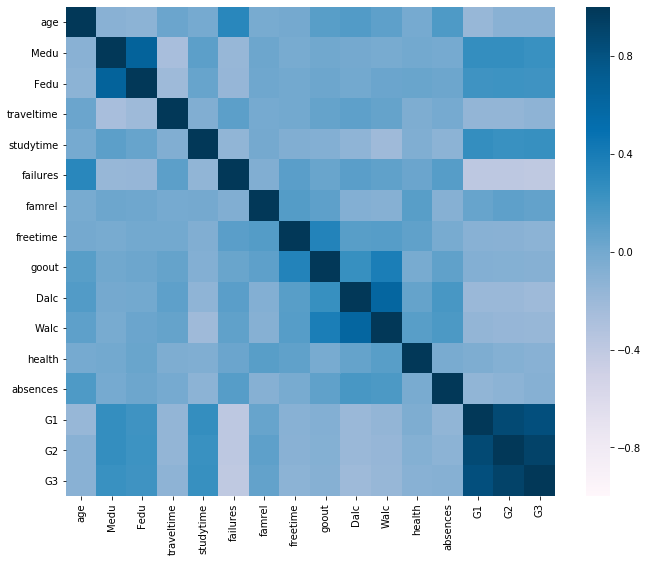

In [9]:
correlations = pordf.corr()
f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(correlations, cmap = "PuBu", center = 0, vmin = -1, vmax = 1, square = True)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

Not all features are seen, due to some of them having dtypes = object.<br>
For this, we have to use one hot encoding, before we can use our feature selection diagram.

<h4>Finding Columns that are object data type</h4>

In [10]:
index = 0
objdtype_arr = []
for i in pordf.dtypes:
    if(i == object):
        objdtype_arr.append(pordf.columns[index])
    index += 1

print(objdtype_arr)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


<h4>Finding the number of unique values in each object data type</h4>

In [11]:
for i in range(len(objdtype_arr)):
    colName = objdtype_arr[i]
    print(colName, pordf[colName].nunique())

school 2
sex 2
address 2
famsize 2
Pstatus 2
Mjob 5
Fjob 5
reason 4
guardian 3
schoolsup 2
famsup 2
paid 2
activities 2
nursery 2
higher 2
internet 2
romantic 2


<h4>Doing one hot encoding with temp dataframe (dummy)</h4>

In [12]:
# Temp dummy dataframe
dummy_df = pordf

In [13]:
#Doing one hot encoding
enc = OneHotEncoder(handle_unknown = "ignore")

for i in range(len(objdtype_arr)):
    colName = objdtype_arr[i]
    dummy_df = pd.get_dummies(dummy_df, columns = [colName], prefix = [colName + "_is"])

In [14]:
dummy_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_is_GP,school_is_MS,sex_is_F,sex_is_M,address_is_R,address_is_U,famsize_is_GT3,famsize_is_LE3,Pstatus_is_A,Pstatus_is_T,Mjob_is_at_home,Mjob_is_health,Mjob_is_other,Mjob_is_services,Mjob_is_teacher,Fjob_is_at_home,Fjob_is_health,Fjob_is_other,Fjob_is_services,Fjob_is_teacher,reason_is_course,reason_is_home,reason_is_other,reason_is_reputation,guardian_is_father,guardian_is_mother,guardian_is_other,schoolsup_is_no,schoolsup_is_yes,famsup_is_no,famsup_is_yes,paid_is_no,paid_is_yes,activities_is_no,activities_is_yes,nursery_is_no,nursery_is_yes,higher_is_no,higher_is_yes,internet_is_no,internet_is_yes,romantic_is_no,romantic_is_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


<h4>Feature Selection diagram</h4>

Now, we can draw our feature selection diagram.<br>

In [15]:
dataX = dummy_df.drop(["G3"], axis = 1)
dataY = dummy_df[["G3"]]

In [16]:
TrainValidX, testX, TrainValidY, testY = train_test_split(np.array(dataX), np.array(dataY), test_size = 0.2, random_state = 10)

In [17]:
att_names = dummy_df.columns[0:len(dummy_df.columns)]
att_names = att_names.drop("G3")
att_names

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_is_GP', 'school_is_MS', 'sex_is_F', 'sex_is_M', 'address_is_R',
       'address_is_U', 'famsize_is_GT3', 'famsize_is_LE3', 'Pstatus_is_A',
       'Pstatus_is_T', 'Mjob_is_at_home', 'Mjob_is_health', 'Mjob_is_other',
       'Mjob_is_services', 'Mjob_is_teacher', 'Fjob_is_at_home',
       'Fjob_is_health', 'Fjob_is_other', 'Fjob_is_services',
       'Fjob_is_teacher', 'reason_is_course', 'reason_is_home',
       'reason_is_other', 'reason_is_reputation', 'guardian_is_father',
       'guardian_is_mother', 'guardian_is_other', 'schoolsup_is_no',
       'schoolsup_is_yes', 'famsup_is_no', 'famsup_is_yes', 'paid_is_no',
       'paid_is_yes', 'activities_is_no', 'activities_is_yes', 'nursery_is_no',
       'nursery_is_yes', 'higher_is_no', 'higher_is_yes', 'internet_is_no',
       'internet_is_yes', 'romantic_is_no', 'roman

We use SelectKBest() library for feature selection.<br>

<BarContainer object of 58 artists>

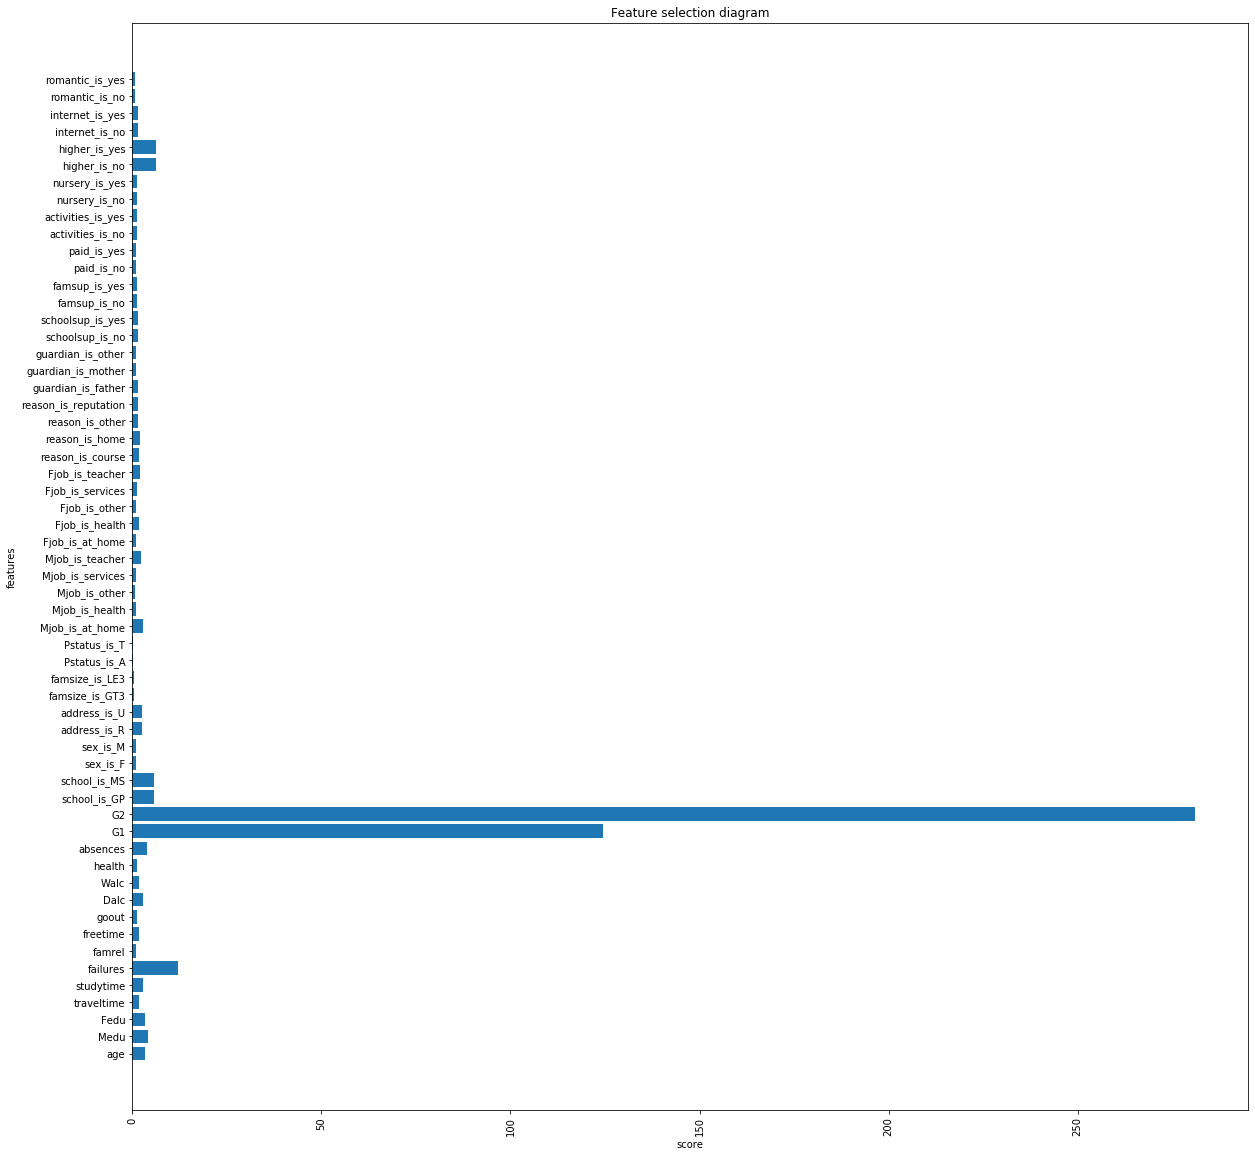

In [18]:
# Feature selection
featureSelector = SelectKBest(score_func = f_classif, k = 6).fit(TrainValidX, TrainValidY)
plt.figure(figsize=(20, 20))
scores = featureSelector.scores_

plt.title("Feature selection diagram")
plt.xlabel("score")
plt.ylabel("features")
plt.xticks(rotation = "vertical")
plt.barh(att_names, scores, )

From this, we can see that G1 and G2 heavily affects G3.<br>
This means that G1 and G2 and the only variables that affect G3 a lot, compared to the rest of the 30 variables.<br>
<br>
Since G1 and G2 are the grades, we have decided to create a new variable "Grade score average" (GA).<br>
GA will be calculated by the following method<br>
G1 * 20% + G2 + 30% + G3 * 50%<br>
<br>
G1 - 20% overall marks<br>
G2 - 30% overall marks<br>
G3 - 50% overall marks<br>
<br>
The grades are evaulated this way, as compared to 33% overall marks as G3 is the final score, and G2 is seen to have more correlations to G3 than G1.<br>

In [19]:
pordf["GA"] = round(pordf["G1"] * 0.2 + pordf["G2"] * 0.3 + pordf["G3"] * 0.5, 1)

In [20]:
pordf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,8.8
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.6


<h4>Redo feature selection diagram</h4>

In [21]:
# Temp dummy dataframe
dummy_df2 = pordf

In [22]:
#Doing one hot encoding
enc = OneHotEncoder(handle_unknown = "ignore")

for i in range(len(objdtype_arr)):
    colName = objdtype_arr[i]
    dummy_df2 = pd.get_dummies(dummy_df2, columns = [colName], prefix = [colName + "_is"])

In [23]:
dummy_df2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA,school_is_GP,school_is_MS,sex_is_F,sex_is_M,address_is_R,address_is_U,famsize_is_GT3,famsize_is_LE3,Pstatus_is_A,Pstatus_is_T,Mjob_is_at_home,Mjob_is_health,Mjob_is_other,Mjob_is_services,Mjob_is_teacher,Fjob_is_at_home,Fjob_is_health,Fjob_is_other,Fjob_is_services,Fjob_is_teacher,reason_is_course,reason_is_home,reason_is_other,reason_is_reputation,guardian_is_father,guardian_is_mother,guardian_is_other,schoolsup_is_no,schoolsup_is_yes,famsup_is_no,famsup_is_yes,paid_is_no,paid_is_yes,activities_is_no,activities_is_yes,nursery_is_no,nursery_is_yes,higher_is_no,higher_is_yes,internet_is_no,internet_is_yes,romantic_is_no,romantic_is_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,8.8,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,10.6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,12.3,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,14.0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,12.6,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [24]:
dataX = dummy_df2.drop(["G1", "G2", "G3", "GA"], axis = 1)
dataY = dummy_df2[["GA"]]

In [25]:
TrainValidX, testX, TrainValidY, testY = train_test_split(np.array(dataX), np.array(dataY), test_size = 0.2, random_state = 10)

In [26]:
att_names = dummy_df2.columns[0:len(dummy_df2.columns)]
att_names = att_names.drop(["G1", "G2", "G3", "GA"])
att_names

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'school_is_GP', 'school_is_MS', 'sex_is_F', 'sex_is_M', 'address_is_R',
       'address_is_U', 'famsize_is_GT3', 'famsize_is_LE3', 'Pstatus_is_A',
       'Pstatus_is_T', 'Mjob_is_at_home', 'Mjob_is_health', 'Mjob_is_other',
       'Mjob_is_services', 'Mjob_is_teacher', 'Fjob_is_at_home',
       'Fjob_is_health', 'Fjob_is_other', 'Fjob_is_services',
       'Fjob_is_teacher', 'reason_is_course', 'reason_is_home',
       'reason_is_other', 'reason_is_reputation', 'guardian_is_father',
       'guardian_is_mother', 'guardian_is_other', 'schoolsup_is_no',
       'schoolsup_is_yes', 'famsup_is_no', 'famsup_is_yes', 'paid_is_no',
       'paid_is_yes', 'activities_is_no', 'activities_is_yes', 'nursery_is_no',
       'nursery_is_yes', 'higher_is_no', 'higher_is_yes', 'internet_is_no',
       'internet_is_yes', 'romantic_is_no', 'romantic_is_yes']

<BarContainer object of 56 artists>

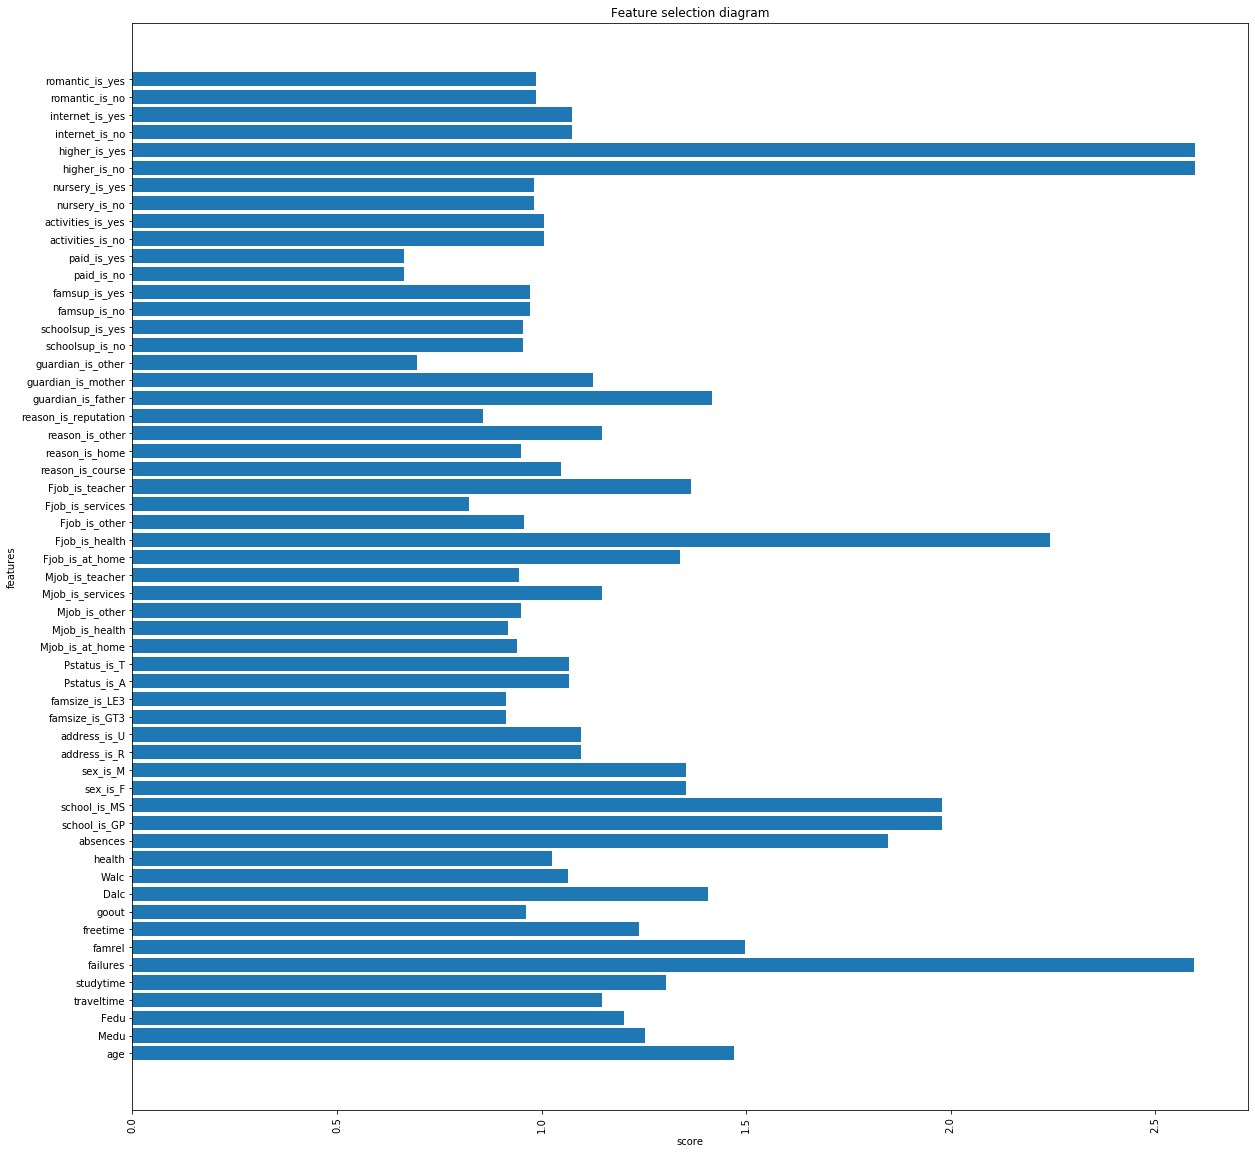

In [27]:
# Feature selection
featureSelector = SelectKBest(score_func = f_classif, k = 6).fit(TrainValidX, TrainValidY)
plt.figure(figsize=(20, 20))
scores = featureSelector.scores_

plt.title("Feature selection diagram")
plt.xlabel("score")
plt.ylabel("features")
plt.xticks(rotation = "vertical")
plt.barh(att_names, scores, )

From here, we can see that the idea of combining all G1 G2 G3 grade features was a good idea, more features affect the target feature.<br>
It is more balanced now, compared to before.<br>
Ultimately, we do not have any significant features that are irrelevant, we would be keeping all features.<br>
Also we can see that that is the case, based on the diagram above.<br>

<h2>Cleaning Data<a name = "cleaningdata"></a></h2>

<h4>Check for NA values</h4>

In [28]:
pordf.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
GA            0
dtype: int64

There are no NA values.

<h4>Check for missing, impossible values, whitespaces and any other mistakes</h4>

In [29]:
for i in range(numberOfFeatures):
    colName = pordf.columns[i]
    print("Column: ", colName)
    print(pordf[colName].value_counts().sort_index())
    print()

Column:  school
GP    423
MS    226
Name: school, dtype: int64

Column:  sex
F    383
M    266
Name: sex, dtype: int64

Column:  age
15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
Name: age, dtype: int64

Column:  address
R    197
U    452
Name: address, dtype: int64

Column:  famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

Column:  Pstatus
A     80
T    569
Name: Pstatus, dtype: int64

Column:  Medu
0      6
1    143
2    186
3    139
4    175
Name: Medu, dtype: int64

Column:  Fedu
0      7
1    174
2    209
3    131
4    128
Name: Fedu, dtype: int64

Column:  Mjob
at_home     135
health       48
other       258
services    136
teacher      72
Name: Mjob, dtype: int64

Column:  Fjob
at_home      42
health       23
other       367
services    181
teacher      36
Name: Fjob, dtype: int64

Column:  reason
course        285
home          149
other          72
reputation    143
Name: reason, dtype: int64

Column:  guardian
father    153
mother  

value_counts() - We use this to check for any unique data.<br>
There are no errors, based on the unique datas, and no whitespace or impossible values or mistakes.<br>

After processing our data, lets analyse some of the features in Data Exploration.

---

# Data Exploration<a name = "exploration"></a>

In data exploration, we look into some of the features and see its relation to the grade score average (GA).<br>
We look into two types of plots:<br>
One-Variable - Looking at just the variable, how many unique values are there<br>
Two-Variable - Comparing two variables, whats the frequency of a variable occuring based on another variable<br>
We will give our reasoning to why we are analysing such features and hypothesis, and then conclude each graph with analysis based on it.<br>
<br>
<b>Note:</b> We would like to point out that there are also more features that can give good information as well, such as the gender and age group of students taking Portuguese using sex and age.<br>
However, not all of them are relevant to what we are trying to aim for our analysis and modelling. Our goal is to analyse GA.<br>
Therefore, our data exploration can definitely be further improved. (for future work i guess)<br>

<h2>One-Variable plots<a name = "oneplot"></a></h2>

<h4>Student's family size</h4>

Investigating the students family size as to whether it is greater than or equal to three OR whether it is less than 3.

Text(0, 0.5, 'count')

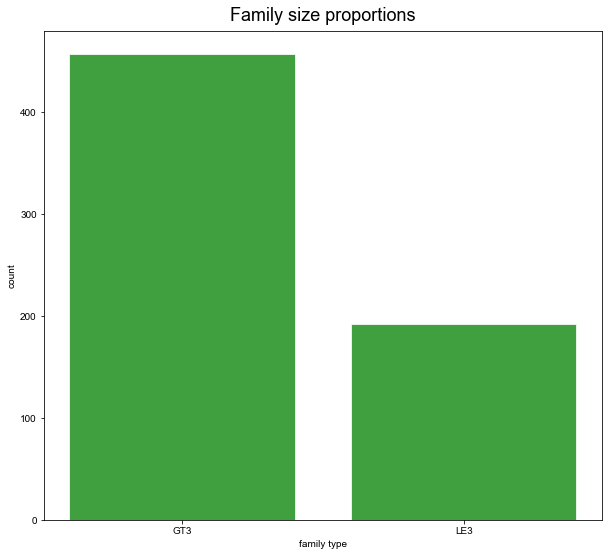

In [30]:
count = pordf.famsize.unique()
famsizes = pordf.famsize.value_counts()

fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.bar(count, famsizes, color = "green", alpha = 0.75)
plt.title(label = "Family size proportions", fontweight = 10, pad = "10.0")
plt.xlabel("family type")
plt.ylabel("count")

We can see that the majority of students are in families greater than 3 people, this would indicate that the majority of students have atleast one other sibling. We can see that there are also a signicant number of students who are only children, this number may also contain students with a sibling with a parent who has passed or other edge cases such as living with a single parent.

<h4>Gender of students in dataset</h4>

It would be expected to see a 50/50 male to female ratio for this subject as that is the average male to female population around the world however this will need to be seen as gender representation in subjects is variable.

Text(0, 0.5, 'Count')

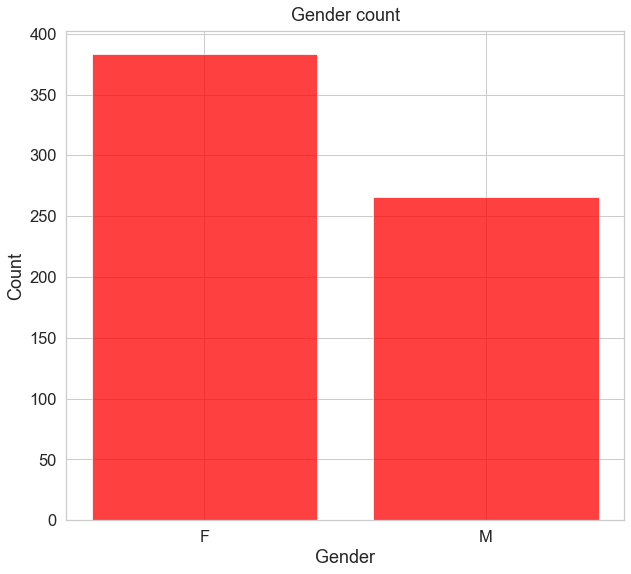

In [31]:
count = pordf.sex.unique()
sexs = pordf.sex.value_counts()

fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.bar(count, sexs, color = "red", alpha = 0.75)
plt.title(label = "Gender count", fontweight = 10, pad = "10.0")
plt.xlabel("Gender")
plt.ylabel("Count")

We can see that there are more female students than there male students for the given dataset

<h4>Age of students in dataset</h4>

We are looking into the age of the students in the given dataset to provide us context with the ages of the students we are performing our analysis on. We would expect the majority of our students to be within the highschool age as this is generally when people learn a second language.

Text(0, 0.5, 'Count')

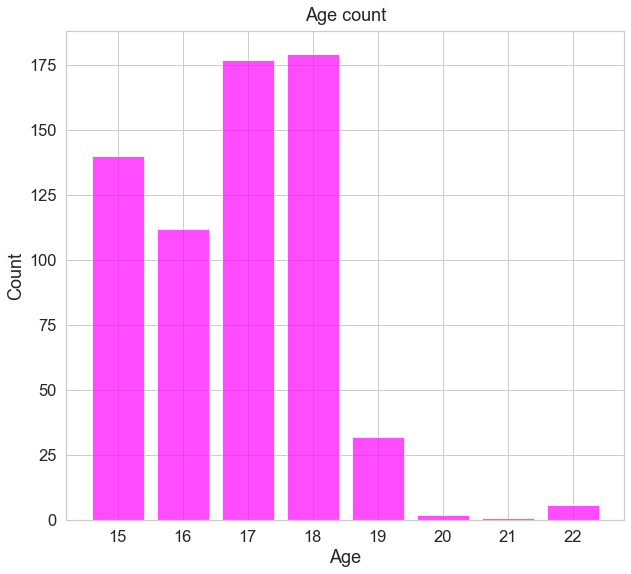

In [32]:
counts = pordf.age.value_counts()
ages = pordf.age.unique() 

fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.bar(ages, counts, color = "magenta", alpha = 0.7)
plt.title(label = "Age count", fontweight = 10, pad = "10.0")
plt.xlabel("Age")
plt.ylabel("Count")

From the above we can see that the vast majority of the cohort is within the standard highschool age which is 18 and under. There is a sharp decline from the age of 18 which is the most common age for the students in the dataset to 19 which is the 5th most common age in the dataset. The sharp drop off from the proportion of students being 18 to 19 is most likely due to most students finishing high scool at the age of 18. From the age of 19 to the age of 20 there is again another sharp decline. It is likely that the majority of students of the age 19 are still in high school and had started school a year later than their peers. Similar numbers of students are seen for the ages of 20,21 and 22, these may be people who have dropped out of school at one point and wish to attain their high school pass or may be people who are just intersted in learning another language, it can be concluded that it is unlikely for a student to be over the age of 19 when taking this subject. 

<h4>Student's guardian</h4>

Analysing the nominated guardian of a student, one thing to take note of is that in some circumstances the student may not be able to nominate their desired parent if they are being raised by a single parent for example. We do not have the data as to which students elected their mother/father/other with a choice of another parent, some of these students will not have had a choice in their nominated guardian as they may only have 1 to choose from.

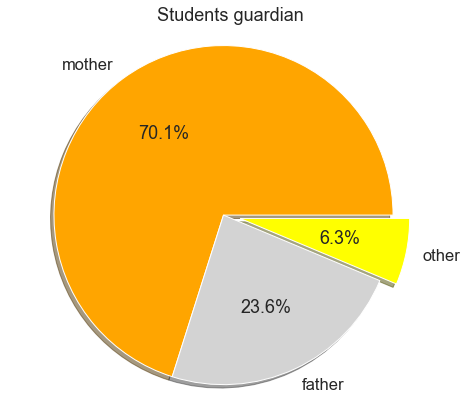

In [33]:
counts = pordf.guardian.value_counts()
guardian_category = pordf.guardian.unique()

colors = ["orange", "lightgrey", "yellow"]
explode = (0, 0, 0.1)
fig, ax = plt.subplots(figsize = (8, 7))
plt.pie(counts, labels = guardian_category, autopct = "%1.1f%%", shadow = True, explode = explode, colors = colors)
plt.title("Students guardian")
plt.axis("equal")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()

In [34]:
counts = pordf.guardian.value_counts()
mother = counts[0]
father = counts[1]
other = counts[2]

print("Number of students with their mother as their guardian: ", mother)
print("Number of students with their father as their guardian: ", father)
print("Number of students with other as their guardian: ", other)

Number of students with their mother as their guardian:  455
Number of students with their father as their guardian:  153
Number of students with other as their guardian:  41


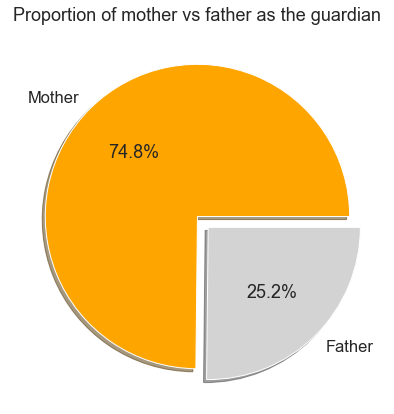

In [35]:
counts = pordf.guardian.value_counts()
mother = counts[0]
father = counts[1]

colors = ["orange", "lightgrey"]
parents_category = ["Mother", "Father"]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize = (8, 7))
parental_pref = np.array([mother, father])
plt.pie(parental_pref, labels = parents_category, autopct = "%1.1f%%", shadow = True, explode = explode, colors = colors)
plt.title("Proportion of mother vs father as the guardian")
plt.show()

We can see that most students nominated guardian is their mother standing at 70.8% of overall nominations followed by the father at 23.6% and then other at 6.3%. This would indicate to us that generally the primary carer of the student will be the mother. If we only factor whether a mother or father was chosen as the nominated guardian we can see that the proportion of students with their mother is their represent approximately 3/4 of students and students with their father representing 1/4 of the population. 

<h4>Students with internet access</h4>

It will be interesting to see the amount of students that have access to the internet compared to those that do not and whether or not any interesting trends arise. 

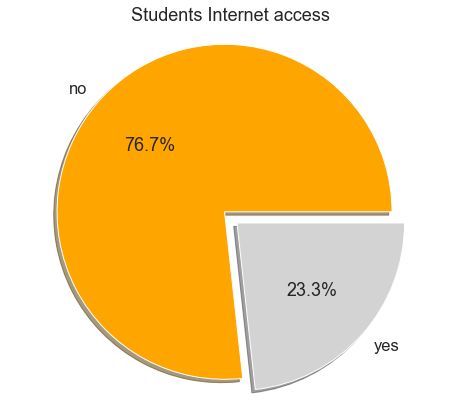

In [36]:
counts = pordf.internet.value_counts()
access_type = pordf.internet.unique()
colors = ["orange", "lightgrey"]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize = (8, 7))
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.pie(counts,labels = access_type, autopct = "%1.1f%%", shadow = True, explode = explode, colors = colors)
plt.title("Students Internet access")
plt.axis("equal")
plt.show()

We can see that infact the majority of students do not have access to the internet with those that do repressenting less than 1/4 of the entire dataset. This may have an affect on the performance of a student which will be evaluated later.<br>
The majority of students do not have internet access at home, considering that it was 2005 - 2006.<br>

<h4>Students in romantic relationship</h4>

We expecting the majority of the cohort to not be in a relationship as they are still studying and as age increases the likelyhoood an individual is in a relationship increases. We are inspecting this variable as a potential factor in as to why the overall cohort may perform better or worse. 

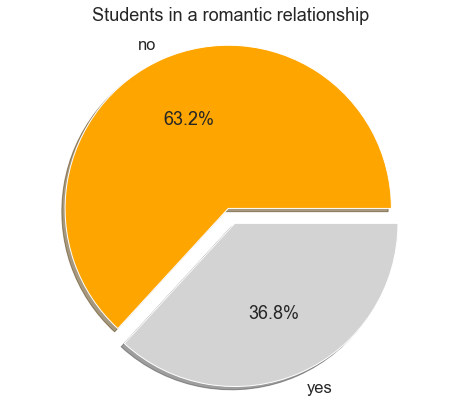

In [37]:
counts = pordf.romantic.value_counts()
access_type = pordf.romantic.unique()
colors = ["orange", "lightgrey"]

explode = (0.1, 0)
fig, ax = plt.subplots(figsize = (8, 7))
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.pie(counts,labels = access_type, autopct = "%1.1f%%", shadow = True, explode = explode, colors = colors)
plt.title("Students in a romantic relationship")
plt.axis("equal")
plt.show()

We can see that only 36.8% of the cohort is currently in a romantic relationship. This is around what we would be expecting and does not come across as being disproportionately large or small.

<h2>Two-Variable plots<a name = "twoplot"></a></h2>

<h4>Boxplot of all grade types</h4>

Taking a look at the boxplot and histogram of all grade types, we can see how all students fair against one another, and against each grade type.<br>
Any outliers in boxplot or histogram is not an outlier, as the scores we checked earlier are between 0 - 20, which fits the dataset.<br>
It just means the the student performed exceptionally well compared to his/her peers or exceptionally bad compared to his/her peers.<br>
<br>
<b>Note:</b> While these may look like one-variable plots, the idea is to compare all the grades boxplot and histogram with each other, therefore I placed it under two-variable plots.

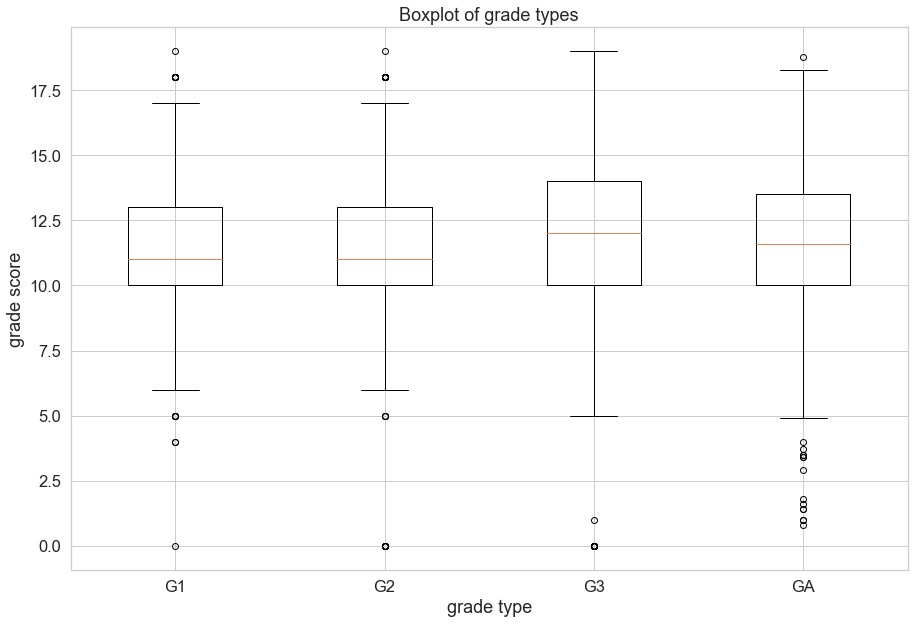

In [38]:
grade_dictionary = {"G1": pordf["G1"].values, "G2": pordf["G2"].values, "G3": pordf["G3"].values, "GA":pordf["GA"].values}

fig, ax = plt.subplots(figsize = (15, 10))
ax.boxplot(grade_dictionary.values())
ax.set_title("Boxplot of grade types")
ax.set_xlabel('grade type')
ax.set_ylabel('grade score')
ax.set_xticklabels(grade_dictionary.keys())
ax = sns.set(style = "whitegrid", font_scale = 1.5)

Here, we can see that the average score for all grades is about 10 to 12.<br>
G3 seems to be scored better by students as compared to G1 and G2 since it has a bigger box (1st and 3rd quartile), and a wider 0th position.<br>
It also has many students who scored good marks.<br>
Lets see the number of students who did well or poorly compared to what is recognised by the boxplot.

G1
Number of outliers below:  8
Number of outliers above:  8



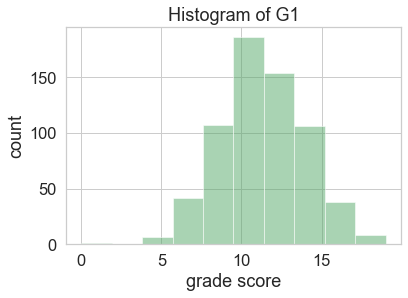


G2
Number of outliers below:  10
Number of outliers above:  15



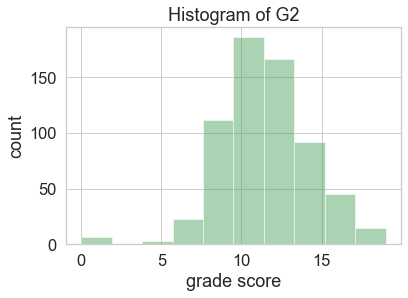


G3
Number of outliers below:  16
Number of outliers above:  0



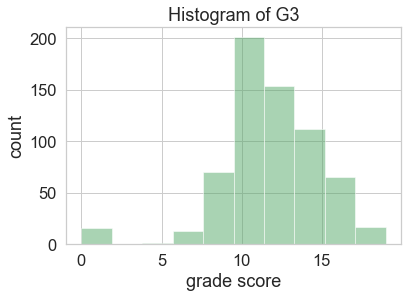


GA
Number of outliers below:  14
Number of outliers above:  1



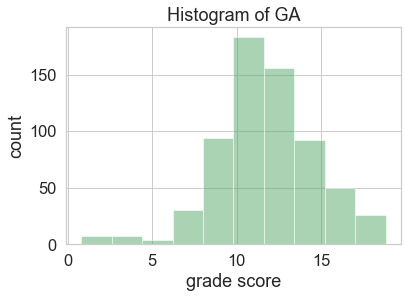

In [39]:
grade_types = ["G1", "G2", "G3", "GA"]

for i in range (len(grade_types)):
    colName = grade_types[i]

    # Finding 1st quartile and 3rd quartile
    q1Value = np.quantile(pordf[colName], 0.25)
    q3Value = np.quantile(pordf[colName], 0.75)
    
    # Finding interquartile range
    iqr = q3Value - q1Value
    
    # Finding lower and upper bounds of boxplot
    lower_bound = q1Value - (1.5 * iqr)
    upper_bound = q3Value + (1.5 * iqr)
    
    print(colName)
    print("Number of outliers below: ", len(pordf[pordf[colName] < lower_bound]))
    print("Number of outliers above: ", len(pordf[pordf[colName] > upper_bound]))
    print()
    
    pordf[colName].hist(color = "g", alpha = 0.5)
    plt.title("Histogram of " + colName)
    plt.xlabel("grade score")
    plt.ylabel("count")
    plt.show()
    print()

Each outlier shows the number of students who did poorly (below) and number of students who did well (above).<br>
G1 and G2 are more evenly spreaded out compared to G3, as many students had high marks for G3.<br>
Also, most students fall under 10 score (50% marks) for all grade types. Test/Exam must have been kinda rough for most students.<br>

In [40]:
pordf_columns_variables = ["G1", "G2", "G3", "GA"]

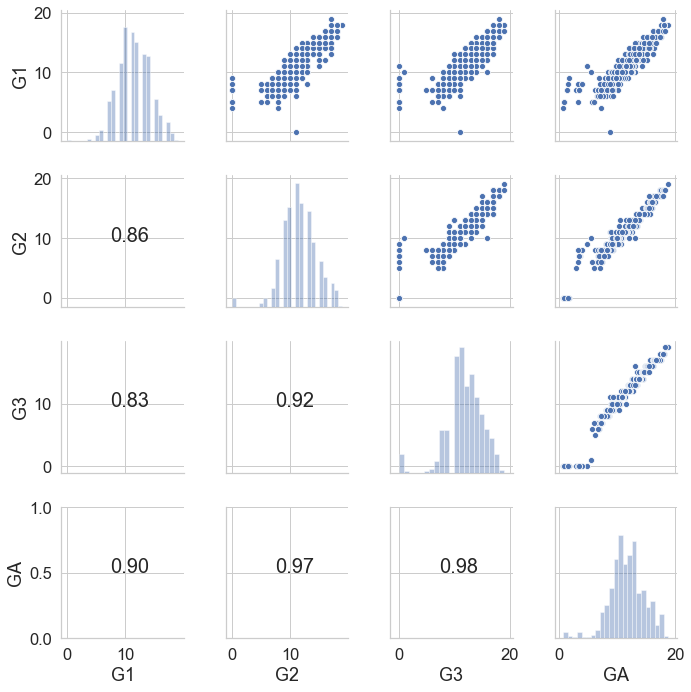

In [41]:
# Plotting scatterplots, histograms and correlation coefficients for features
# Uses correlationfunction(x_axis, y_axis, **kws) function to find the correlation coefficients
def correlationfunction(x_axis, y_axis, **kws):
    r, _ = stats.pearsonr(x_axis, y_axis)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy = (.4, .5), xycoords = ax.transAxes, fontsize = 20)
    
g = sns.PairGrid(pordf, vars = pordf_columns_variables)
g.map_upper(sns.scatterplot)
g.map_lower(correlationfunction)
g.map_diag(sns.distplot, kde = False)
plt.show();

Here we can see that all grades are highly correlated with each other.<br>
This is also a good reason to use GA (combine all into one grade) if we want to create a model (Data modelling) for all grades since one grade (we use GA in this case) can represent all to a high extent.<br>

<h4>Percentage of Pass and Fail in each school</h4>

There are two different schools (GP and MS) in this dataset.<br>
Since these 2 schools have different size densities, we decided to use a pie chart to see how students from each school did. <br>
Pass or fail would be based on GA, where pass is GA >= 10, and fail is GA < 10.

In [42]:
GP_pass = 0
GP_fail = 0
MS_pass = 0
MS_fail = 0

for index, row in pordf.iterrows():
    if(pordf["school"][index] == "GP"):
        if(pordf["GA"][index] >= 10): # GP_pass
            GP_pass = GP_pass + 1
        else: # GP_fail
            GP_fail = GP_fail + 1
    else: # pordf["school"][index] == "MS"
        if(pordf["GA"][index] >= 10): # MS_pass
            MS_pass = MS_pass + 1
        else: # MS_fail 
            MS_fail = MS_fail + 1

In [43]:
# Pass and Fail labels, colors and explode (for nicer pie charts)
passfail_labels = "Pass", "Fail"
passfail_colors = ["springgreen", "lightcoral"]
passfail_explode = (0.1, 0)

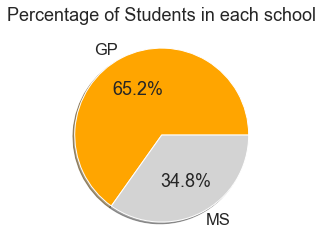

In [44]:
GP_count = GP_pass + GP_fail
MS_count = MS_pass + MS_fail
school_count_slice = [GP_count, MS_count]

fig, ax = plt.subplots()
ax.pie(school_count_slice, labels = ["GP", "MS"], autopct = "%1.1f%%", shadow = True, colors = ["orange", "lightgrey"])
ax.set_title("Percentage of Students in each school")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()

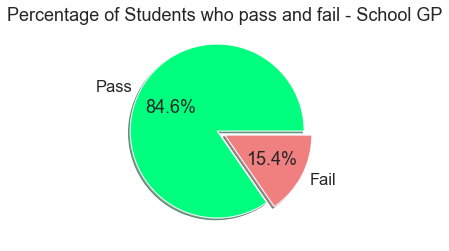

Student count:  423


In [45]:
GP_slice = [GP_pass, GP_fail]

fig, ax = plt.subplots()
ax.pie(GP_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - School GP")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", GP_pass + GP_fail)

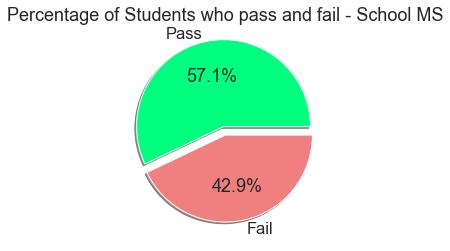

Student count:  226


In [46]:
MS_slice = [MS_pass, MS_fail]

fig, ax = plt.subplots()
ax.pie(MS_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - School MS")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", MS_pass + MS_fail)

Unfortunately, School MS did not do well, as it barely had a 55% passing rate, as compared to School GP, with a high ~85% passing rate.<br>
School MS has a lot to work on to pull those passing rates up.<br>

<h4>Pstatus on grades (living together vs living apart)</h4>

Lets see if there is a difference in pass and fail rates of students who are currently living with or not living with their parents/family.<br>
Since family support is key for a child's development, we are assuming that students who is living with their family would have a higher passing rate.

In [47]:
T_pass = 0
T_fail = 0
A_pass = 0
A_fail = 0

for index, row in pordf.iterrows():
    if(pordf["Pstatus"][index] == "T"):
        if(pordf["GA"][index] >= 10): # T_pass
            T_pass = T_pass + 1
        else: # T_fail
            T_fail = T_fail + 1
    else: # pordf["pstatus"][index] == "A"
        if(pordf["GA"][index] >= 10): # A_pass
            A_pass = A_pass + 1
        else: # A_fail
            A_fail = A_fail + 1

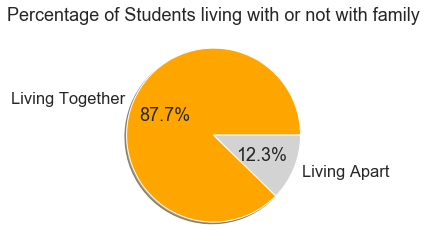

In [48]:
T_count = T_pass + T_fail
A_count = A_pass + A_fail
TA_count_slice = [T_count, A_count]

fig, ax = plt.subplots()
ax.pie(TA_count_slice, labels = ["Living Together", "Living Apart"], autopct = "%1.1f%%", shadow = True, colors = ["orange", "lightgrey"])
ax.set_title("Percentage of Students living with or not with family")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()

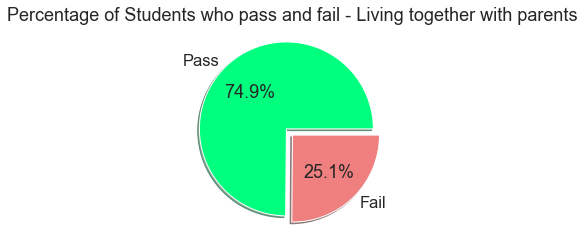

Student count:  569


In [49]:
T_slice = [T_pass, T_fail]

fig, ax = plt.subplots()
ax.pie(T_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Living together with parents")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", T_pass + T_fail)

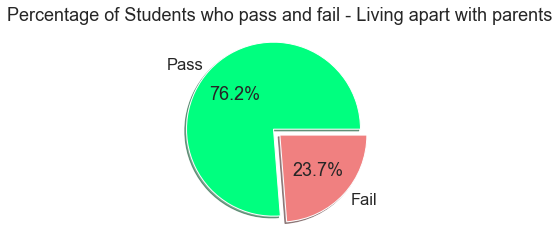

Student count:  80


In [50]:
A_slice = [A_pass, A_fail]

fig, ax = plt.subplots()
ax.pie(A_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Living apart with parents")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", A_pass + A_fail)

We can see that not a lot of students (~12%) live apart from parents.<br>
Even though the percentage is higher for living away from family, we can see that there is not much difference whether a student lives with his/her family.<br>
Perhaps, this means that students who live away from family are more independent. Who knows.<br>
More analysis has to be done with the students to figure out more on this.

<h4>Travel time on grades</h4>

Lets see if there is a difference in grade scores based on travel time.<br>
Students who take a longer time to travel to school would probably have to sleep early to wake up early to leave for school.<br>
This also means that such students would reach home late, having lesser time to study and freetime for themselves.<br>
Would such travel time affect a student's grade? We are guessing it to be, where a longer travel time would result in a lower grade score, but lets see.

In [51]:
# Create a temp dataframe for dataset manulpation
df_traveltime = pordf[["traveltime", "GA"]]
df_traveltime.head()

,traveltime,GA
0,2,8.8
1,1,10.6
2,1,12.3
3,1,14.0
4,1,12.6


In [52]:
df_traveltime["traveltime"].value_counts()

1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64

In [53]:
# Create a dictionary to change all numerical values to categorical values
traveltime_dict = {"traveltime": {1: "1 - 15 mins", 2: "15 - 30 mins", 3: "30 mins - 1 hr", 4: "more than 1 hr"}}

In [54]:
df_traveltime.replace(traveltime_dict, inplace = True)
df_traveltime.head()

,traveltime,GA
0,15 - 30 mins,8.8
1,1 - 15 mins,10.6
2,1 - 15 mins,12.3
3,1 - 15 mins,14.0
4,1 - 15 mins,12.6


In [55]:
df_traveltime.dtypes

traveltime     object
GA            float64
dtype: object

In [56]:
df_traveltime["traveltime"].value_counts()

1 - 15 mins       366
15 - 30 mins      213
30 mins - 1 hr     54
more than 1 hr     16
Name: traveltime, dtype: int64

In [57]:
# Add result column, and set its initial value to fail
df_traveltime["result"] = "fail"
df_traveltime.head()

,traveltime,GA,result
0,15 - 30 mins,8.8,fail
1,1 - 15 mins,10.6,fail
2,1 - 15 mins,12.3,fail
3,1 - 15 mins,14.0,fail
4,1 - 15 mins,12.6,fail


In [58]:
for index, row in df_traveltime.iterrows():
    # When a student scores >= 10, change result from fail to pass
    if(df_traveltime["GA"][index] >= 10):
        df_traveltime["result"][index] = "pass"

In [59]:
df_traveltime["result"].value_counts()

pass    487
fail    162
Name: result, dtype: int64

In [60]:
df_traveltime.sort_values("traveltime", inplace = True)

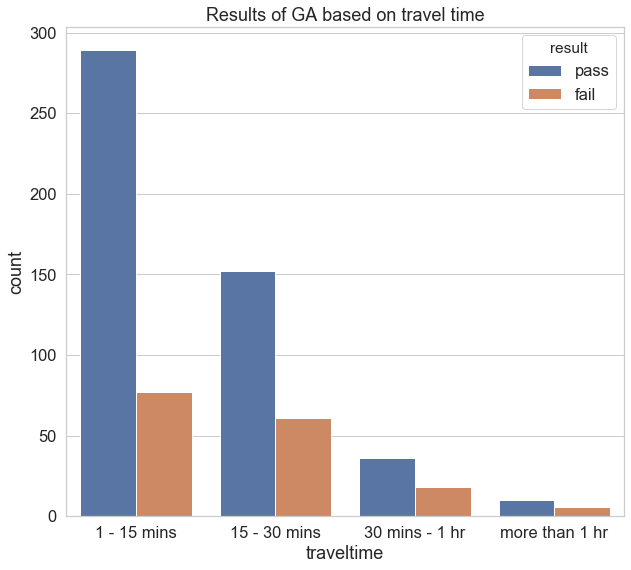

In [61]:
fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.countplot(data = df_traveltime, x = "traveltime", hue = "result").set(title = "Results of GA based on travel time")
ax = sns.set(style = "whitegrid", font_scale = 1.5)

Most students take less than 15 mins to travel to school.<br>
Therefore, we can see that students would definitely prefer to enter a nearby school.<br>
<br>
Based on the current count and percentages, we can see that students who take less than 30 mins to travel to school have a higher passing rate.<br>
However, there is very limited data for students who take more than 30 mins to travel to school, espcially students who take more than 1 hr to school.<br>

<h4>Study time on grades</h4>

How does the amount of time spent in studying? Does studying more in terms on time having a higher chance of a passing grade?<br>
Is there a relation in managing time to study and grades?<br>
We are guessing that it would be the case. However, is there be any evidence on this based on this dataset?<br>

In [62]:
# Create a temp dataframe for dataset manulpation
df_studytime = pordf[["studytime", "GA"]]
df_studytime.head()

,studytime,GA
0,2,8.8
1,2,10.6
2,2,12.3
3,3,14.0
4,2,12.6


In [63]:
df_studytime["studytime"].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [64]:
# Create a dictionary to change all numerical values to categorical values
studytime_dict = {"studytime": {1: "1 - 2 hrs", 2: "2 - 5 hrs", 3: "5 - 10 hrs", 4: "more than 10 hrs"}}

In [65]:
df_studytime.replace(studytime_dict, inplace = True)
df_studytime.head()

,studytime,GA
0,2 - 5 hrs,8.8
1,2 - 5 hrs,10.6
2,2 - 5 hrs,12.3
3,5 - 10 hrs,14.0
4,2 - 5 hrs,12.6


In [66]:
df_studytime.dtypes

studytime     object
GA           float64
dtype: object

In [67]:
df_studytime["studytime"].value_counts()

2 - 5 hrs           305
1 - 2 hrs           212
5 - 10 hrs           97
more than 10 hrs     35
Name: studytime, dtype: int64

In [68]:
# Add result column, and set its initial value to fail
df_studytime["result"] = "fail"
df_studytime.head()

,studytime,GA,result
0,2 - 5 hrs,8.8,fail
1,2 - 5 hrs,10.6,fail
2,2 - 5 hrs,12.3,fail
3,5 - 10 hrs,14.0,fail
4,2 - 5 hrs,12.6,fail


In [69]:
for index, row in df_studytime.iterrows():
    # When a student scores >= 10, change result from fail to pass
    if(df_studytime["GA"][index] >= 10):
        df_studytime["result"][index] = "pass"

In [70]:
df_studytime["result"].value_counts()

pass    487
fail    162
Name: result, dtype: int64

In [71]:
df_studytime.sort_values("studytime", inplace = True)

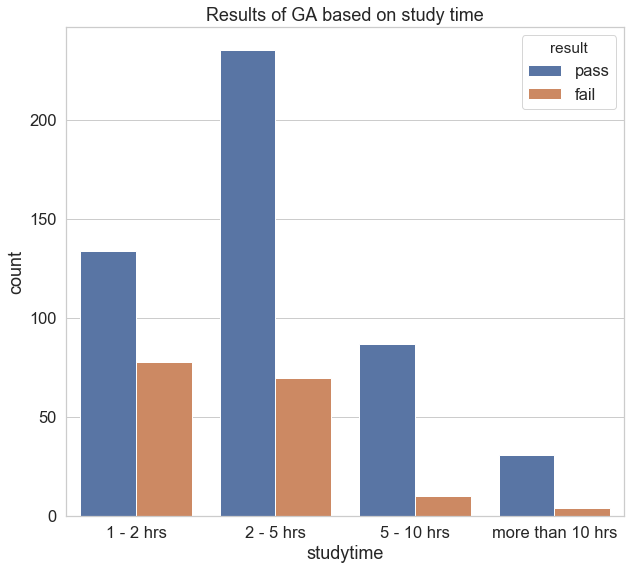

In [72]:
fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.countplot(data = df_studytime, x = "studytime", hue = "result").set(title = "Results of GA based on study time")
ax = sns.set(style = "whitegrid", font_scale = 1.5)

From this, we can see that most students study between 2 to 5 hours.<br>
The more time spent on studying, the better the passing rate.<br>
However, this does not mean that studying overexcessively would result in good grades, and we can see that students failed even though they studied for more than 10 hours.<br>

<h4>Study time against grade average</h4>

Students that study more would be expected to have a higher chance to pass however it would also be useful to see how the amount of time a student studies affects their over all performance outside of just passing and failing 

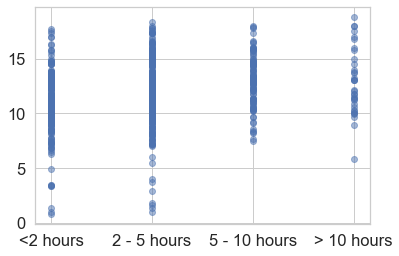

In [73]:
studyData = pd.DataFrame()
studyData['studyTime'] = pordf.studytime
studyData['GA'] = pordf.GA
studyData.sort_values(by=['studyTime'], inplace=True)

studyData.studyTime = studyData.studyTime.replace([4], '> 10 hours')
studyData.studyTime = studyData.studyTime.replace([3], '5 - 10 hours')
studyData.studyTime = studyData.studyTime.replace([2], '2 - 5 hours')
studyData.studyTime = studyData.studyTime.replace([1], '<2 hours')

colors = np.random.rand(500)
plt.scatter(studyData.studyTime,studyData.GA,alpha =.5)
plt.show()

<h4>Students who want to do higher education on grades</h4>

Here, we are looking to see if there is a relationship of students passing their studies related to whether they want to continue their study in future.<br>
Are there a high percentage of students who do not want to further their studies?<br>
For students who pass, is there a significant percentage of students who do not want to further their studies?<br>

In [74]:
higheryes_pass = 0
higheryes_fail = 0
higherno_pass = 0
higherno_fail = 0

for index, row in pordf.iterrows():
    if(pordf["higher"][index] == "yes"):
        if(pordf["GA"][index] >= 10): # higheryes_pass
            higheryes_pass = higheryes_pass + 1
        else: # higheryes_fail
            higheryes_fail = higheryes_fail + 1
    else: # pordf["higher"][index] == "no"
        if(pordf["GA"][index] >= 10): # higherno_pass
            higherno_pass = higherno_pass + 1
        else: # higherno_fail
            higherno_fail = higherno_fail + 1

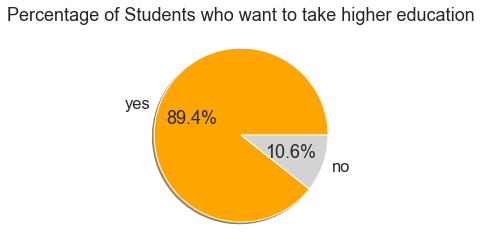

In [75]:
higher_yes = higheryes_pass + higheryes_fail
higher_no = higherno_pass + higherno_fail
students_higher_slice = [higher_yes, higher_no]

fig, ax = plt.subplots()
ax.pie(students_higher_slice, labels = ["yes", "no"], autopct = "%1.1f%%", shadow = True, colors = ["orange", "lightgrey"])
ax.set_title("Percentage of Students who want to take higher education")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()

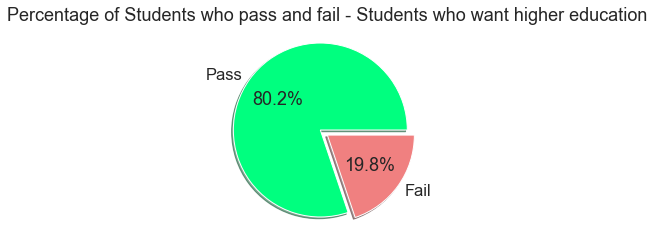

Student count:  580


In [76]:
higheryes_slice = [higheryes_pass, higheryes_fail]

fig, ax = plt.subplots()
ax.pie(higheryes_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Students who want higher education")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", higheryes_pass + higheryes_fail)

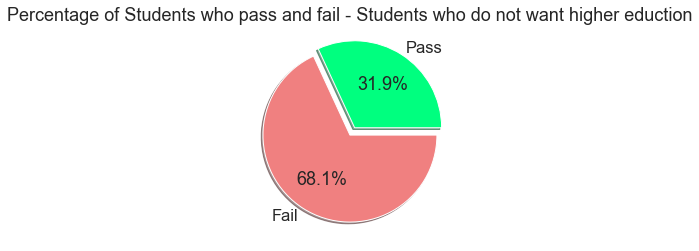

Student count:  69


In [77]:
higherno_slice = [higherno_pass, higherno_fail]

fig, ax = plt.subplots()
ax.pie(higherno_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Students who do not want higher eduction")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", higherno_pass + higherno_fail)

We can see that most (90%) of the students intend to further their studies.<br>
Students who want a higher education aim to pass their grades.<br>
Students who do not pass tend to not want to further their studies.<br>
About a third of students who pass their grade do not intend to further their studies.<br>
Perhaps they have other commitment? (i.e. family job).<br>
About ~20% of students who want to further their studies failed their grades.<br>
Since this is just a subject (Portuguese), it is definitely not the end of the world for them. All the best to their other subject results.

<h4>Activities on grades (extra curricular activities)</h4>

Extra curricular activities is known for taking too much time, and we know previously that having lesser time for studying will affect grades.<br>
Therefore, lets see if students with extra curricular activities tend to fail their grades (GA for this analysis).

In [78]:
activityyes_pass = 0
activityyes_fail = 0
activityno_pass = 0
activityno_fail = 0

for index, row in pordf.iterrows():
    if(pordf["activities"][index] == "yes"):
        if(pordf["GA"][index] >= 10): # activityyes_pass
            activityyes_pass = activityyes_pass + 1
        else: # activityyes_fail
            activityyes_fail = activityyes_fail + 1
    else: # pordf["activities"][index] == "no"
        if(pordf["GA"][index] >= 10): # activityno_pass
            activityno_pass = activityno_pass + 1
        else: # activityno_fail
            activityno_fail = activityno_fail + 1

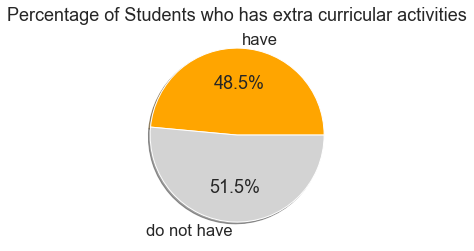

In [79]:
actyes_count = activityyes_pass + activityyes_fail
actno_count = activityno_pass + activityno_fail
act_count_slice = [actyes_count, actno_count]

fig, ax = plt.subplots()
ax.pie(act_count_slice, labels = ["have", "do not have"], autopct = "%1.1f%%", shadow = True, colors = ["orange", "lightgrey"])
ax.set_title("Percentage of Students who has extra curricular activities")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()

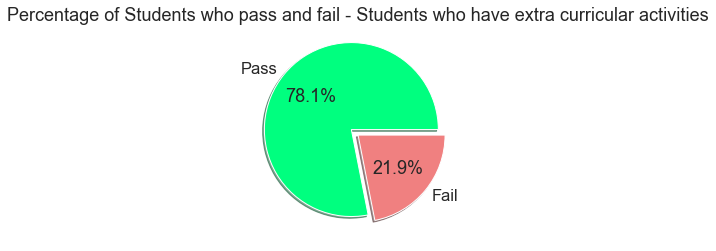

Student count:  315


In [80]:
activityyes_slice = [activityyes_pass, activityyes_fail]

fig, ax = plt.subplots()
ax.pie(activityyes_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Students who have extra curricular activities")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", activityyes_pass + activityyes_fail)

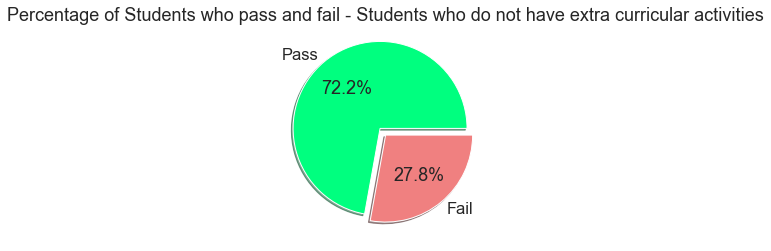

Student count:  334


In [81]:
activityno_slice = [activityno_pass, activityno_fail]

fig, ax = plt.subplots()
ax.pie(activityno_slice, labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
ax.set_title("Percentage of Students who pass and fail - Students who do not have extra curricular activities")
ax = sns.set(style = "whitegrid", font_scale = 1.5)
plt.show()
print("Student count: ", activityno_pass + activityno_fail)

There is about an even amount of students who have and do not have extra curricular activities.<br>
However, the percentage of students who pass is around the same.<br>
This means that having extra curricular activities do not have much impact on grade.<br>
Of course, it may still have affect, since grades are based on individual students, but at least we can see from the pie charts that having extra curricular activities does not make students fail.

<h4>Alcoholic on grades (add weekday and weekend, scale to out of 10)</h4>

Does drinking alcohol affect your grades?<br>
Here we try and figure out if that is so.<br>
Students are asked how much they drink on weekdays(Dalc) and weekends(Walc) from a range of:
1 very low<br>
2 low<br>
3 medium<br>
4 high<br>
5 very high<br>
<br>
We combined both weekdays and weekends (making it a week) drinking and scored it out of 10.<br>
1 - 2 very low<br>
3 - 4 low<br>
5 - 6 medium<br>
7 - 8 high<br>
9 - 10 very high<br>
<br>
Now, lets see if drinking a lot during the week has an affect on grades.<br>
<b>Disclaimer:</b> Dataset is taken from reference. We do not encourage and are not promoting underage drinking based on the analysis.

In [82]:
# Create a temp dataframe for dataset manulpation
df_alcohol = pordf[["Dalc", "Walc", "GA"]]
df_alcohol.head()

,Dalc,Walc,GA
0,1,1,8.8
1,1,1,10.6
2,2,3,12.3
3,1,1,14.0
4,1,2,12.6


In [83]:
df_alcohol.dtypes

Dalc      int64
Walc      int64
GA      float64
dtype: object

In [84]:
# Combines all weekday and weekend alcoholic consumption (still numbers)
df_alcohol["weekly_alcohol_level"] = df_alcohol["Dalc"] + df_alcohol["Walc"]

In [85]:
df_alcohol.head()

,Dalc,Walc,GA,weekly_alcohol_level
0,1,1,8.8,2
1,1,1,10.6,2
2,2,3,12.3,5
3,1,1,14.0,2
4,1,2,12.6,3


In [86]:
df_alcohol["weekly_alcohol_level"].value_counts().sort_index()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
9       6
10     15
Name: weekly_alcohol_level, dtype: int64

In [87]:
# Create a dictionary to change all numerical values to categorical values
# alcohol dictionary guide
# 1 - 2 very low
# 3 - 4 low
# 5 - 6 medium
# 7 - 8 high
# 9 - 10 very high
alcohol_dict = {"weekly_alcohol_level": {1: "very low", 
                                         2: "very low", 
                                         3: "low", 
                                         4: "low",
                                         5: "medium",
                                         6: "medium",
                                         7: "high",
                                         8: "high",
                                         9: "very high",
                                         10: "very high"}}

In [88]:
df_alcohol.replace(alcohol_dict, inplace = True)
df_alcohol.head()

,Dalc,Walc,GA,weekly_alcohol_level
0,1,1,8.8,very low
1,1,1,10.6,very low
2,2,3,12.3,medium
3,1,1,14.0,very low
4,1,2,12.6,low


In [89]:
df_alcohol.dtypes

Dalc                      int64
Walc                      int64
GA                      float64
weekly_alcohol_level     object
dtype: object

In [90]:
df_alcohol["weekly_alcohol_level"].value_counts()

very low     241
low          215
medium       123
high          49
very high     21
Name: weekly_alcohol_level, dtype: int64

In [91]:
# Add result column, and set its initial value to fail
df_alcohol["result"] = "fail"
df_alcohol.head()

,Dalc,Walc,GA,weekly_alcohol_level,result
0,1,1,8.8,very low,fail
1,1,1,10.6,very low,fail
2,2,3,12.3,medium,fail
3,1,1,14.0,very low,fail
4,1,2,12.6,low,fail


In [92]:
for index, row in df_studytime.iterrows():
    # When a student scores >= 10, change result from fail to pass
    if(df_alcohol["GA"][index] >= 10):
        df_alcohol["result"][index] = "pass"

In [93]:
df_alcohol["result"].value_counts()

pass    487
fail    162
Name: result, dtype: int64

In [94]:
# Ordering weekly_alcohol_level for easier diagram drawing
df_alcohol["weekly_alcohol_level"] = pd.Categorical(df_alcohol["weekly_alcohol_level"], categories = ["very low", "low", "medium", "high", "very high"], ordered = True)
df_alcohol.sort_values("weekly_alcohol_level", ascending = True, inplace = True)

In [95]:
df_alcohol.head()

,Dalc,Walc,GA,weekly_alcohol_level,result
0,1,1,8.8,very low,fail
269,1,1,14.5,very low,pass
562,1,1,12.1,very low,pass
266,1,1,14.2,very low,pass
264,1,1,9.9,very low,fail


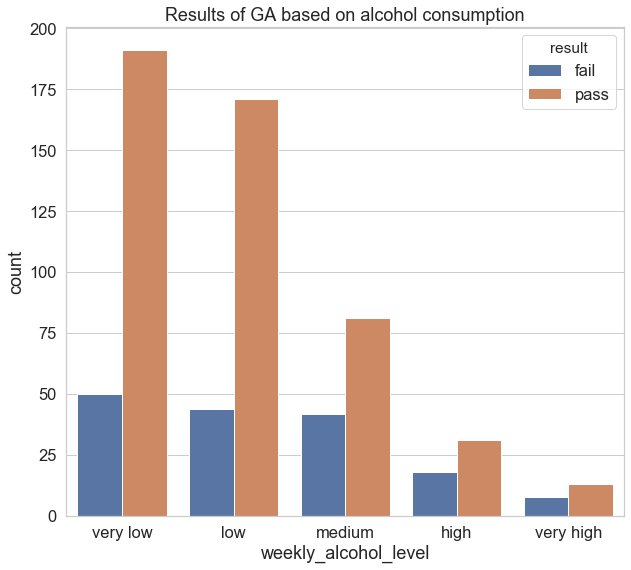

In [96]:
fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.countplot(data = df_alcohol, x = "weekly_alcohol_level", hue = "result").set(title = "Results of GA based on alcohol consumption")
ax = sns.set(style = "whitegrid", font_scale = 1.5)

In [97]:
vl_pass = 0
vl_fail = 0

l_pass = 0
l_fail = 0

m_pass = 0
m_fail = 0

h_pass = 0
h_fail = 0

vh_pass = 0
vh_fail = 0


for index, row in df_alcohol.iterrows():
    if(df_alcohol["weekly_alcohol_level"][index] == "very low"):
        if(df_alcohol["result"][index] == "pass"): # vl_pass
            vl_pass = vl_pass + 1
        else: # vl_fail
            vl_fail = vl_fail + 1
            
    elif(df_alcohol["weekly_alcohol_level"][index] == "low"):
        if(df_alcohol["result"][index] == "pass"): # l_pass
            l_pass = l_pass + 1
        else: # l_fail
            l_fail = l_fail + 1            
            
    elif(df_alcohol["weekly_alcohol_level"][index] == "medium"):
        if(df_alcohol["result"][index] == "pass"): # m_pass
            m_pass = m_pass + 1
        else: # l_fail
            m_fail = m_fail + 1      
            
    elif(df_alcohol["weekly_alcohol_level"][index] == "high"):
        if(df_alcohol["result"][index] == "pass"): # h_pass
            h_pass = h_pass + 1
        else: # l_fail
            h_fail = h_fail + 1
            
    else: # (df_alcohol["weekly_alcohol_level"][index] == "very high")
        if(df_alcohol["result"][index] == "pass"): # vh_pass
            vh_pass = vh_pass + 1
        else: # l_fail
            vh_fail = vh_fail + 1

print(vl_pass + vl_fail + l_pass + l_fail + m_pass + m_fail + h_pass + h_fail + vh_pass + vh_fail)

649


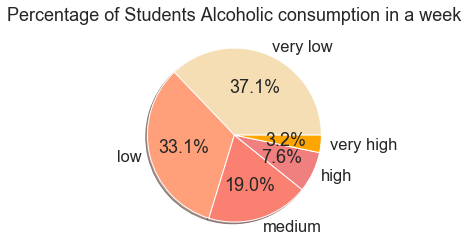

In [98]:
vl_count = vl_pass + vl_fail
l_count = l_pass + l_fail
m_count = m_pass + m_fail
h_count = h_pass + h_fail
vh_count = vh_pass + vh_fail

alcohol_count_slice = [vl_count, l_count, m_count, h_count, vh_count]
alcohol_count_label = df_alcohol["weekly_alcohol_level"].unique()
alcohol_count_colors = ["wheat", "lightsalmon", "salmon", "lightcoral", "orange"]

fig, ax = plt.subplots()
ax.pie(alcohol_count_slice, labels = alcohol_count_label, autopct = "%1.1f%%", shadow = True, colors = alcohol_count_colors)
ax.set_title("Percentage of Students Alcoholic consumption in a week")
ax = sns.set(font_scale = 1.5)
plt.show()

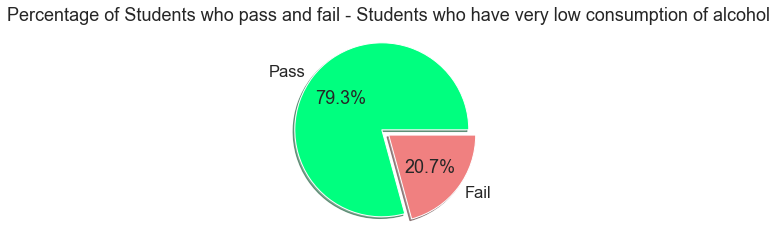

Student count:  241


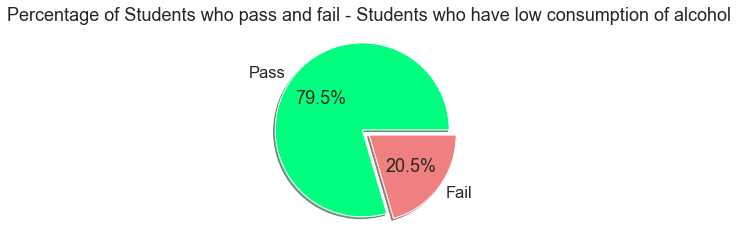

Student count:  215


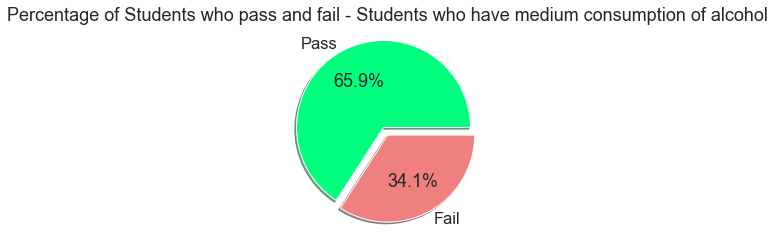

Student count:  123


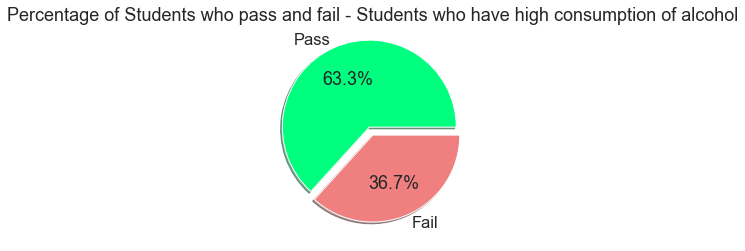

Student count:  49


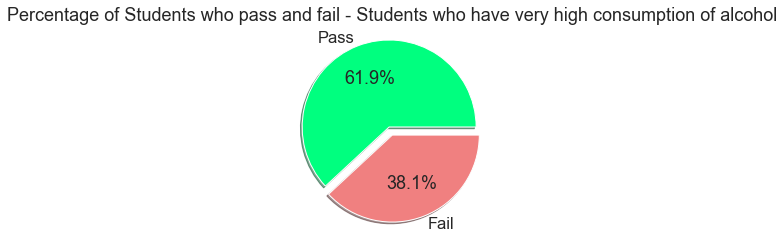

Student count:  21


In [99]:
vl_slice = [vl_pass, vl_fail]
l_slice = [l_pass, l_fail]
m_slice = [m_pass, m_fail]
h_slice = [h_pass, h_fail]
vh_slice = [vh_pass, vh_fail]

alcohol_slice_dict = {"very low": vl_slice,
                      "low": l_slice,
                      "medium": m_slice,
                      "high": h_slice,
                      "very high": vh_slice,}

alcohol_unique_slices = len(df_alcohol.nunique())

for key in alcohol_slice_dict:
    fig, ax = plt.subplots()
    ax.pie(alcohol_slice_dict.get(key), labels = passfail_labels, autopct = "%1.1f%%", shadow = True, explode = passfail_explode, colors = passfail_colors)
    ax.set_title("Percentage of Students who pass and fail - Students who have " + key + " consumption of alcohol")
    ax = sns.set(style = "whitegrid", font_scale = 1.5)
    plt.show()
    studentCount = alcohol_slice_dict.get(key)[0] + alcohol_slice_dict.get(key)[1]
    print("Student count: ", studentCount)

Majority of the students (~70%) do not partake in drinking alcohol.<br>
For students who drink alcohol, we can see that the more the alcohol consumption, the lower the passing rate.<br>
Therefore, do not drink excessively, drink moderately, and no underage drinking.<br>

From the plots and data visualisations we have made in our data exploration we have been able to make the following key oberservations.<br>
We have seen some but not all features on how they affect the target feature. We have also seen what affects and not affects a student to pass or fail in their Portuguese exam.<br>
Now we shall proceed to Data Modelling.

---

## Data Modeling <a name="datamodelling"></a>

We will now proceed to create a multiple linear regression that predicts GA using all features (Full model) and selective features (Reduced model) through backwards elimination.<br>
However, firstly  we have to change any catogorical features into one-hot encoding for the purpose of creating our model.<br>
We use an OLS (Ordinary Least Squares) model to fit our encoded data.<br>

In [100]:
pordf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,8.8
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.6


In [101]:
pordf.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'GA'],
      dtype='object')

Categorical columns have to be changed using one hot encoding
They are:
- school
- sex
- address
- famsize
- Pstatus
- Medu (Currently in Integer Encoding)
- Fedu (Currently in Integer Encoding)
- Mjob
- Fjob
- reason
- guardian
- traveltime (Currently in Integer Encoding)
- studytime (Currently in Integer Encoding)
- failures (Currently in Integer Encoding)
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic
- famrel (Currently in Integer Encoding)
- freetime (Currently in Integer Encoding)
- goout (Currently in Integer Encoding)
- Dalc (Currently in Integer Encoding)
- Walc (Currently in Integer Encoding)
- health (Currently in Integer Encoding)

Some of the features that are having numbers (dtypes = int64) are Categorical data. While they are currently in integer encoding, we decided to have them in one-hot encoded as well.<br>
<b>Reason?</b> We want to avoid the data modelling to think that higher values = better.

In [102]:
# Create a dictionary to change all numerical values to categorical values
integerencoding_dict = {"Medu": {0: "none", 1: "4th_grade", 2: "5th_to_9th_grade", 3: "secondary_education", 4: "higher_education"},
                        "Fedu": {0: "none", 1: "4th_grade", 2: "5th_to_9th_grade", 3: "secondary_education", 4: "higher_education"},
                        "traveltime": {1: "less_than_15mins", 2: "15_to_30mins", 3: "30mins_to_1hr", 4: "more_than_1hr"},
                        "studytime": {1: "1_to_2hrs", 2: "2_to_5hrs", 3: "5_to_10hrs", 4: "more_than_10hrs"},
                        "failures": {1: "1", 2: "2", 3: "3", 4: "4_or_more"},
                        "famrel": {1: "very_bad", 2: "bad", 3: "average", 4: "good", 5: "excellent"},
                        "freetime": {1: "very_low", 2: "low", 3: "medium", 4: "high", 5: "very_high"},
                        "goout": {1: "very_low", 2: "low", 3: "medium", 4: "high", 5: "very_high"},
                        "Dalc": {1: "very_low", 2: "low", 3: "medium", 4: "high", 5: "very_high"},
                        "Walc": {1: "very_low", 2: "low", 3: "medium", 4: "high", 5: "very_high"},
                        "health": {1: "very_low", 2: "low", 3: "medium", 4: "high", 5: "very_high"},
                       }

In [103]:
# Encoded dataframe
pordf_encoded = pordf

In [104]:
pordf_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,8.8
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.6


In [105]:
pordf_encoded.replace(integerencoding_dict, inplace = True)
pordf_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GA
0,GP,F,18,U,GT3,A,higher_education,higher_education,at_home,teacher,course,mother,15_to_30mins,2_to_5hrs,0,yes,no,no,no,yes,yes,no,no,good,medium,high,very_low,very_low,medium,4,0,11,11,8.8
1,GP,F,17,U,GT3,T,4th_grade,4th_grade,at_home,other,course,father,less_than_15mins,2_to_5hrs,0,no,yes,no,no,no,yes,yes,no,excellent,medium,medium,very_low,very_low,medium,2,9,11,11,10.6
2,GP,F,15,U,LE3,T,4th_grade,4th_grade,at_home,other,other,mother,less_than_15mins,2_to_5hrs,0,yes,no,no,no,yes,yes,yes,no,good,medium,low,low,medium,medium,6,12,13,12,12.3
3,GP,F,15,U,GT3,T,higher_education,5th_to_9th_grade,health,services,home,mother,less_than_15mins,5_to_10hrs,0,no,yes,no,yes,yes,yes,yes,yes,average,low,low,very_low,very_low,very_high,0,14,14,14,14.0
4,GP,F,16,U,GT3,T,secondary_education,secondary_education,other,other,home,father,less_than_15mins,2_to_5hrs,0,no,yes,no,no,yes,yes,no,no,good,medium,low,very_low,low,very_high,0,11,13,13,12.6


In [106]:
pordf_encoded = pd.get_dummies(pordf_encoded, drop_first=True)
pordf_encoded.head()

,age,absences,G1,G2,G3,GA,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_5th_to_9th_grade,Medu_higher_education,Medu_none,Medu_secondary_education,Fedu_5th_to_9th_grade,Fedu_higher_education,Fedu_none,Fedu_secondary_education,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,traveltime_30mins_to_1hr,traveltime_less_than_15mins,traveltime_more_than_1hr,studytime_2_to_5hrs,studytime_5_to_10hrs,studytime_more_than_10hrs,failures_1,failures_2,failures_3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,famrel_bad,famrel_excellent,famrel_good,famrel_very_bad,freetime_low,freetime_medium,freetime_very_high,freetime_very_low,goout_low,goout_medium,goout_very_high,goout_very_low,Dalc_low,Dalc_medium,Dalc_very_high,Dalc_very_low,Walc_low,Walc_medium,Walc_very_high,Walc_very_low,health_low,health_medium,health_very_high,health_very_low
0,18,4,0,11,11,8.8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,17,2,9,11,11,10.6,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,15,6,12,13,12,12.3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,15,0,14,14,14,14.0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,16,0,11,13,13,12.6,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


In [107]:
# Getting descriptive features
descriptive_features_string = " + ".join(pordf_encoded.drop(columns = ["G1", "G2", "G3", "GA"]).columns)
features_encoded = "GA ~ " + descriptive_features_string
print("features encoded: ", features_encoded)

features encoded:  GA ~ age + absences + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Medu_5th_to_9th_grade + Medu_higher_education + Medu_none + Medu_secondary_education + Fedu_5th_to_9th_grade + Fedu_higher_education + Fedu_none + Fedu_secondary_education + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + traveltime_30mins_to_1hr + traveltime_less_than_15mins + traveltime_more_than_1hr + studytime_2_to_5hrs + studytime_5_to_10hrs + studytime_more_than_10hrs + failures_1 + failures_2 + failures_3 + schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes + famrel_bad + famrel_excellent + famrel_good + famrel_very_bad + freetime_low + freetime_medium + freetime_very_high + freetime_very_low + goout_low + goout_medium + goout_very_high + goout_very_low + Dalc_low + Dalc_m

### Full Model <a name="fullmodel"></a>

Full model consists of all descriptive features (with one-hot encoding).

In [108]:
full_model = sm.formula.ols(formula = features_encoded, data = pordf_encoded)
full_model_fitted = full_model.fit()
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     6.597
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           6.21e-40
Time:                        17:21:36   Log-Likelihood:                -1429.1
No. Observations:                 649   AIC:                             2998.
Df Residuals:                     579   BIC:                             3311.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [109]:
print(f'Full Model R-squared = {full_model_fitted.rsquared:.4f}')
print(f'Full Model Adj. R-squared = {full_model_fitted.rsquared_adj:.4f}')

Full Model R-squared = 0.4401
Full Model Adj. R-squared = 0.3734


Based on adjusted R-squared = 0.3734, this means that 37.3% of variance is seen in the model.<br>
There are also a number of descriptive features that have a p-value > 0.05. These features are insignificant and would most probably be removed in Reduced model.<br>
We shall now analyse some graphs/diagrams of our Full model.

<h4>Plotting Predicted GA score vs Actual GA score</h4>

In [110]:
full_residuals = pd.DataFrame({'actual': pordf_encoded["GA"], 
                               'predicted': full_model_fitted.fittedvalues, 
                               'residual': full_model_fitted.resid}
                             )

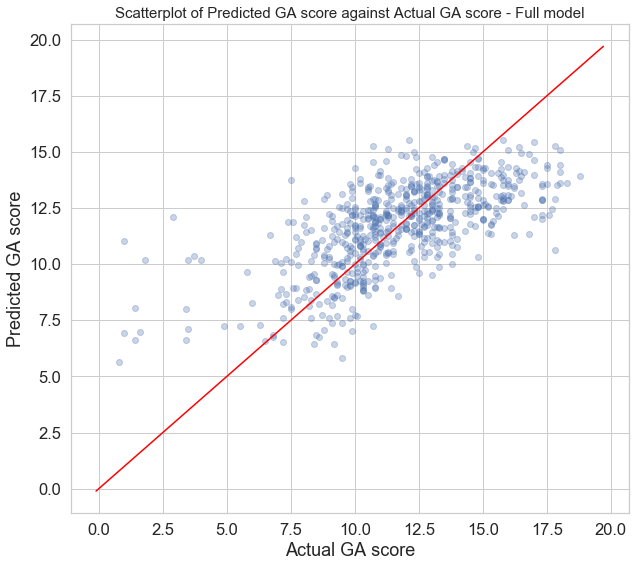

In [111]:
# Uses plot_line(line_axis, line_slope, line_intercept, **kargs) function to plot the red line
def plot_line(line_axis, line_slope, line_intercept, **kargs):
    x_min, x_max = line_axis.get_xlim()
    plt.plot([x_min, x_max], [x_min * line_slope + line_intercept, x_max * line_slope + line_intercept], **kargs)
    
# Creating scatter plot
plt.figure(figsize = (10, 9))
plt.scatter(full_residuals["actual"], full_residuals["predicted"], alpha = 0.3)
plot_line(line_axis = plt.gca(), line_slope = 1, line_intercept = 0, color = "red");
plt.xlabel("Actual GA score")
plt.ylabel("Predicted GA score")
plt.title("Scatterplot of Predicted GA score against Actual GA score - Full model", fontsize = 15)
plt.show()

We can see that the Full model does not offer good prediction when determining a GA score of less than 5.<br>
It overpredicts and guesses that the student's score higher.<br>
Most of the data predicted is in the range of 7.5 to 17.5.<br>

#### Plotting Residuals against Predicted GA score

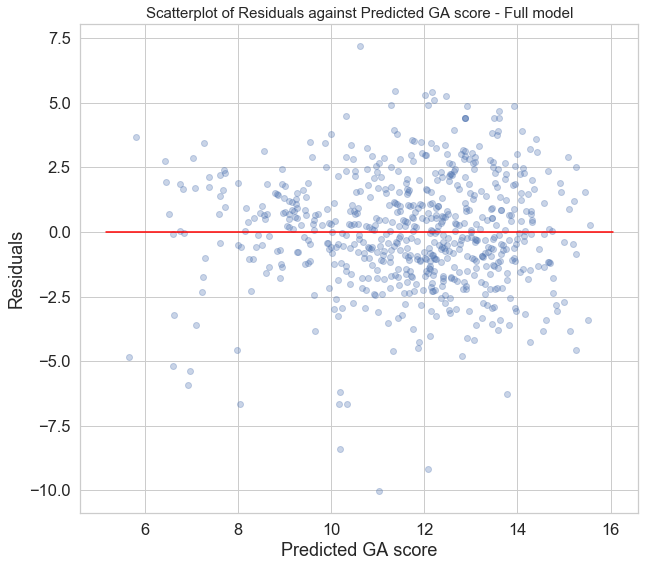

In [112]:
plt.figure(figsize = (10, 9))
plt.scatter(full_residuals["predicted"], full_residuals["residual"], alpha = 0.3)
plot_line(line_axis = plt.gca(),line_slope = 0, line_intercept = 0, color = "red")
plt.xlabel("Predicted GA score")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals against Predicted GA score - Full model", fontsize = 15)
plt.show();

We can see that there are a lot of data scattered all over, suggesting that the constant condition of variability is not fulfilled in least square lines.

#### Plotting Residuals against Actual GA score

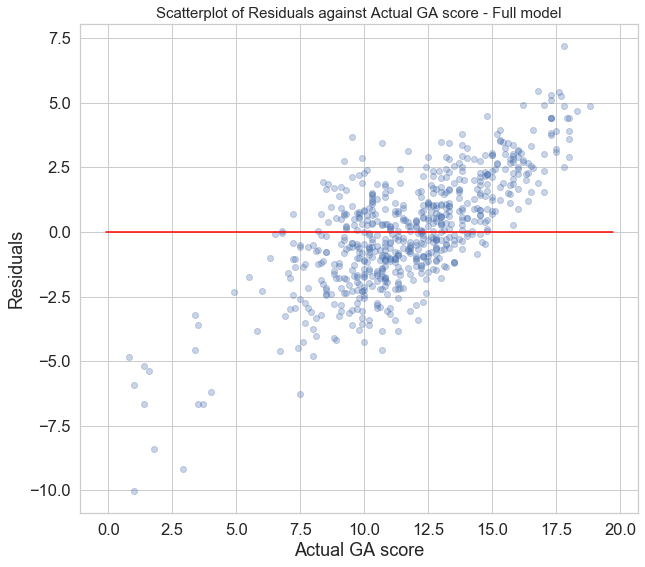

In [113]:
plt.figure(figsize = (10, 9))
plt.scatter(full_residuals["actual"], full_residuals["residual"], alpha = 0.3)
plot_line(line_axis = plt.gca(),line_slope = 0, line_intercept = 0, color = "red")
plt.xlabel("Actual GA score")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals against Actual GA score - Full model", fontsize = 15)
plt.show();

We can see that the Full model underpredicts higher GA score (15.0 and above) and overpredicts lower GA score (7.5 and below).

#### Plotting Histograms of Actual GA score and Predicted GA score

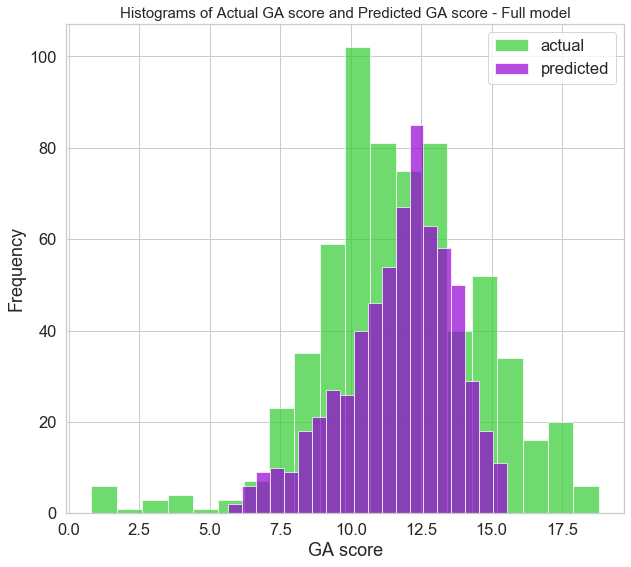

In [114]:
plt.figure(figsize = (10, 9))
plt.hist(full_residuals["actual"], label = "actual", bins = 20, color = "limegreen", alpha = 0.7)
plt.hist(full_residuals["predicted"], label = "predicted", bins = 20, color = "darkviolet", alpha = 0.7)
plt.xlabel("GA score");
plt.ylabel("Frequency");
plt.title("Histograms of Actual GA score and Predicted GA score - Full model", fontsize = 15);
plt.legend()
plt.show()

We can see that the Full model underpredicts the number of students from range 7.5 to 12, and overpredicts the number of students slightly in 12 to 12.5 and about 13.<br>
However, it only starts predicting above 5.0 and stops predicted at 15.5. GA scores lower than 5.0 and above 15.0 cannot be accurately predicted by the Full model.<br>

#### Plotting Histogram of Residuals 

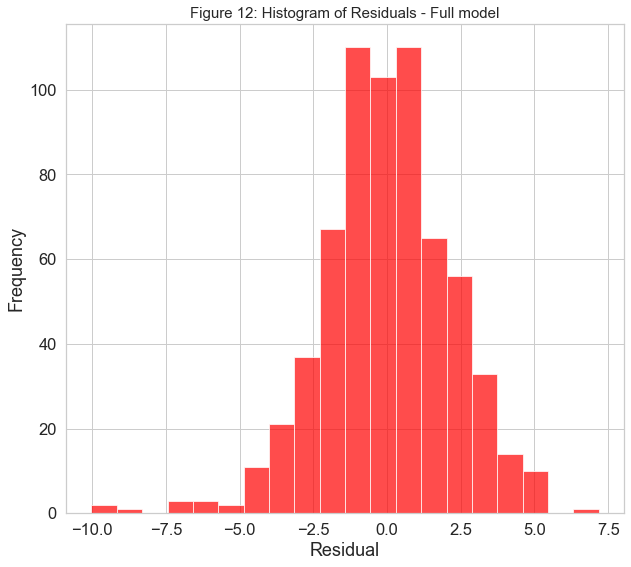

In [115]:
plt.figure(figsize = (10, 9))
plt.hist(full_residuals["residual"], bins = 20, color = "red", alpha = 0.7);
plt.xlabel("Residual");
plt.ylabel("Frequency");
plt.title("Figure 12: Histogram of Residuals - Full model", fontsize = 15);
plt.show();

We can see that the histogram looks rather normalised, although it looks slightly off in the middle, where 0.0 is slightly lower than the bars adjacent to it. However, this still means that the condition of nearly normal residuals in least square lines has been fulfilled to a reasonable extent.

### Reduced Model <a name="reducedmodel"></a>

Reduced Model consists of some descriptive features (with one-hot encoding).<br>
As forwards selection and backwards elimination can result in 2 different models, we have decided to backwards elimination.<br>
While this may be problematic based on the number of features we have (adding one-hot encoding), we want to take all features into consideration, instead of choosing them one at a time.<br>
Backwards elimination was chosen as our preferred stepwise selection for our multiple regression model. We chose to use backwards elimination because in some cases forward selection can produce suppressor effects on our data.<br>
These effects occur when predictors are only significant when another predictor held constant. To avoid these suppressor effects we chose backward selection, selecting all the features of our dataset and experimenting by removing features.<br>

### Feature Selection - Backwards Elimination

In [116]:
## Create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(features_encoded)

# Initialize feature-selected fit to full model
linreg_fit = full_model_fitted

# Do backwards elimination using p-values
pvalue_cutoff = 0.05

print("\nPerforming backwards feature selection using p-values:")

while True:
    pvalue_series = linreg_fit.pvalues.drop(labels = "Intercept")
    pvalue_series = pvalue_series.sort_values(ascending = False)
    term = pvalue_series.index[0]
    pvalue = pvalue_series[0]
    if (pvalue < pvalue_cutoff):
        break
    
    term_components = term.split(":")
    print(f'\nRemoving term "{term}" with p-value {pvalue:.4}')
    
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula = patsy_description, data = pordf_encoded).fit()
    
reduced_model_fitted = smf.ols(formula = patsy_description, data = pordf_encoded).fit()
    
print("")
print(reduced_model_fitted.summary())
print("***")
print(f"Regression number of terms: {len(reduced_model_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {reduced_model_fitted.f_pvalue:.4f}")


Performing backwards feature selection using p-values:

Removing term "health_low" with p-value 0.9553

Removing term "freetime_very_low" with p-value 0.938

Removing term "freetime_very_high" with p-value 0.9082

Removing term "reason_home" with p-value 0.9062

Removing term "Medu_secondary_education" with p-value 0.8785

Removing term "guardian_other" with p-value 0.8569

Removing term "Mjob_teacher" with p-value 0.8447

Removing term "Mjob_other" with p-value 0.819

Removing term "traveltime_less_than_15mins" with p-value 0.8043

Removing term "famrel_bad" with p-value 0.7982

Removing term "Medu_none" with p-value 0.7722

Removing term "nursery_yes" with p-value 0.7463

Removing term "Fjob_services" with p-value 0.7536

Removing term "Walc_medium" with p-value 0.6494

Removing term "Fjob_health" with p-value 0.6276

Removing term "Walc_low" with p-value 0.6135

Removing term "paid_yes" with p-value 0.5523

Removing term "Walc_very_low" with p-value 0.5269

Removing term "reason_re

In [117]:
print(f'Reduced Model R-squared = {reduced_model_fitted.rsquared:.4f}')
print(f'Reduced Model Adj. R-squared = {reduced_model_fitted.rsquared_adj:.4f}')

Reduced Model R-squared = 0.3973
Reduced Model Adj. R-squared = 0.3791


Based on adjusted R-squared = 0.3734, this means that 37.3% of variance is seen in the model.<br>
There are lesser features now, with all features p-value < 0.05 (as done in code).<br>
We shall now analyse some graphs/diagrams of our Full model.<br>

#### Plotting Predicted GA score vs Actual GA score

In [118]:
reduced_residuals = pd.DataFrame({'actual': pordf_encoded["GA"], 
                               'predicted': reduced_model_fitted.fittedvalues, 
                               'residual': reduced_model_fitted.resid}
                             )

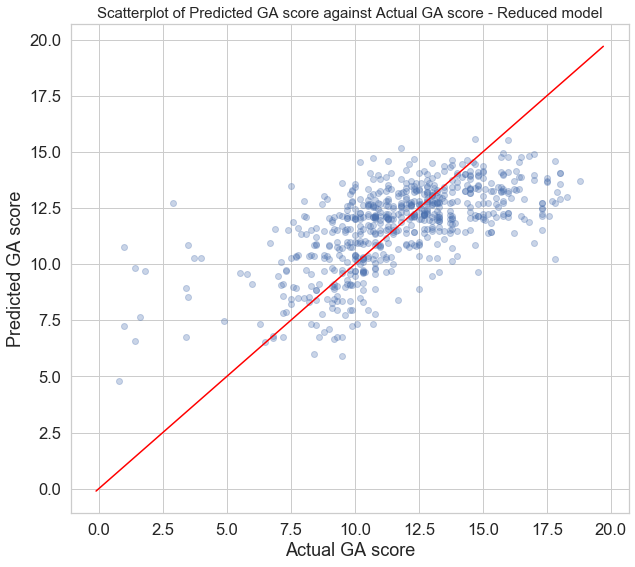

In [119]:
# Creating scatter plot
plt.figure(figsize = (10, 9))
plt.scatter(reduced_residuals["actual"], reduced_residuals["predicted"], alpha = 0.3)
plot_line(line_axis = plt.gca(), line_slope = 1, line_intercept = 0, color = "red");
plt.xlabel("Actual GA score")
plt.ylabel("Predicted GA score")
plt.title("Scatterplot of Predicted GA score against Actual GA score - Reduced model", fontsize = 15)
plt.show()

We can see that our Reduced model is still unable to offer good a prediction when determining a GA score of less than 5 by overpredicting.<br>
Most of the data is still predicted at 7.5 to 17.5.

#### Plotting Residuals against Predicted GA score

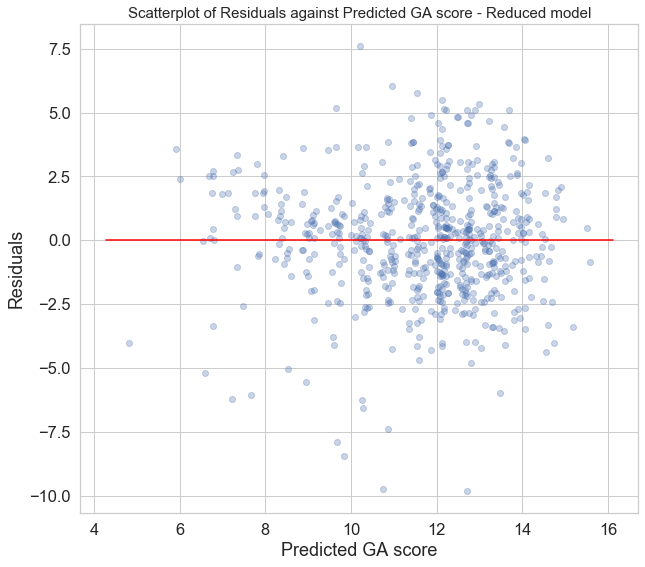

In [120]:
plt.figure(figsize = (10, 9))
plt.scatter(reduced_residuals["predicted"], reduced_residuals["residual"], alpha = 0.3)
plot_line(line_axis = plt.gca(), line_slope = 0, line_intercept = 0, color = "red")
plt.xlabel("Predicted GA score")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals against Predicted GA score - Reduced model", fontsize = 15)
plt.show();

We can see that just like the Full model, the Reduced model also has a lot of data scattered all over, suggesting that the constant condition of variability is also not fulfilled in least square lines in the Reduced model.

<h4>Plotting Residuals against Actual GA score</h4>

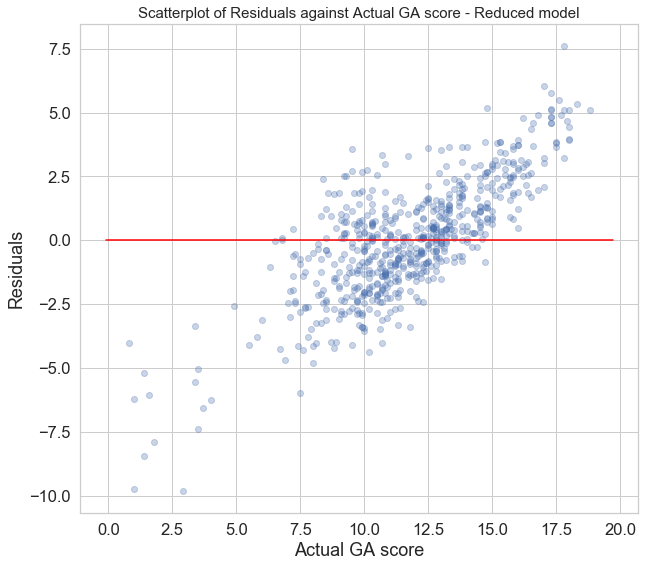

In [121]:
plt.figure(figsize = (10, 9))
plt.scatter(reduced_residuals["actual"], reduced_residuals["residual"], alpha = 0.3)
plot_line(line_axis = plt.gca(), line_slope = 0, line_intercept = 0, color = "red")
plt.xlabel("Actual GA score")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals against Actual GA score - Reduced model", fontsize = 15)
plt.show();

We can see that the Reduced model also underpredicts higher GA score (15.0 and above) and overpredicts lower GA score (7.5 and below).

#### Plotting Histograms of Actual GA score and Predicted GA score

<Figure size 720x648 with 0 Axes>

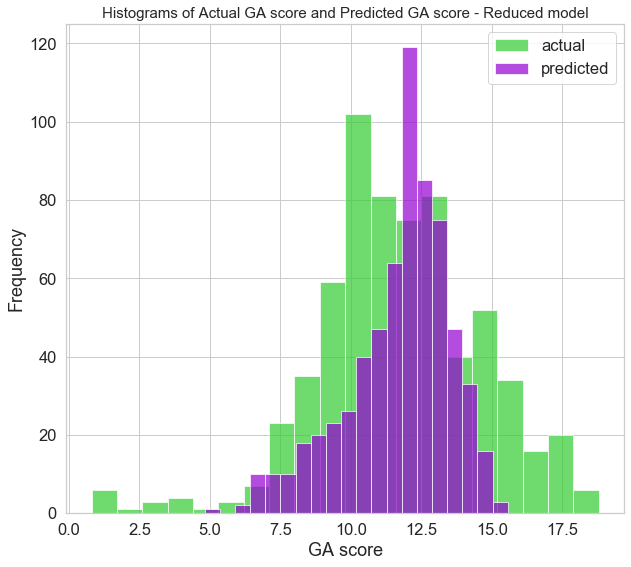

In [122]:
plt.figure(figsize = (10, 9))
plt.figure(figsize = (10, 9))
plt.hist(reduced_residuals["actual"], label = "actual", bins = 20, color = "limegreen", alpha = 0.7)
plt.hist(reduced_residuals["predicted"], label = "predicted", bins = 20, color = "darkviolet", alpha = 0.7)
plt.xlabel("GA score");
plt.ylabel("Frequency");
plt.title("Histograms of Actual GA score and Predicted GA score - Reduced model", fontsize = 15);
plt.legend()
plt.show()

We can see that by comparing this histogram to the Full model, the Reduced model, overpredicts the number of students with 12 to 12.5 `GA`.<br>
It is also unable to predict the number of students below 5.0 and stops predicting after 15.5. GA scores lower than 5.0 and above 15.0 cannot be predicted by the Reduced model.

#### Plotting Histogram of Residuals

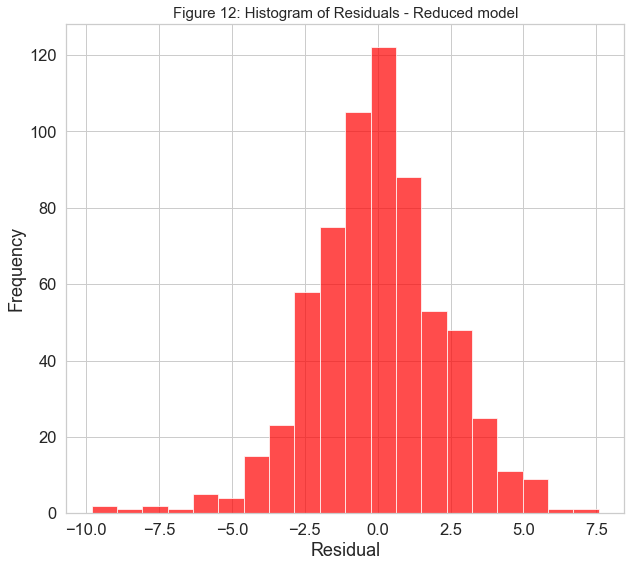

In [123]:
plt.figure(figsize = (10, 9))
plt.hist(reduced_residuals["residual"], bins = 20, color = "red", alpha = 0.7);
plt.xlabel("Residual");
plt.ylabel("Frequency");
plt.title("Figure 12: Histogram of Residuals - Reduced model", fontsize = 15);
plt.show();

We can see that the histogram looks rather normalised, although it looks slightly off in the middle, where 0.0 is slightly lower than the bars adjacent to it. However, this still means that the condition of nearly normal residuals in least square lines is fulfilled to a good extent.

We can see that the residual histogram for Reduced model looks more noramlised compared to the Full model.<br>
Also, there is a higher frequency of Residual = 0.0, which shows that the Reduced model is able to predict slightly better than the Full model.<br>

---

## Summary and Conclusion <a name="conclusion"></a>

We were able to achieve 2 multiple linear regression models - Full and Reduced, with an Adjusted `R-squared value of ~37%`, which is low when it comes to predicting data. As our dataset features were mostly categorical, we had to use one-hot encoding before we can run it through our models. However, we had many features that were insignificant and had to use backwards elimination, we used a p-value cut-off at 0.05, to reduce the number of features in our model. We were able to improve our model and had a final p-value of 0.<br>
Our scatterplots show that in both models, the residuals predicted are all over the place, the data is concentrated when the GA score is 8 to 14. This shows that constant variability is not seen well in both multiple linear regression models. However, the residual histogram does not show any skewed in data as it is mostly normalised, which shows that nearly normal residuals are fulfilled well.<br>
Due to the nature of the dataset whereby the information collected was collected through surveys given to students there it is likely that the data reported is not entired accurate, a particular example of this is where the students who nominated that they studdied more than 10 hours per week had a large spread and in many cases performed worse than the students who nominated that they studdied between 5 and 10 hours a week. It is unintuitive that students who study more perform worse than those that study less and this may be attributed to students incorrectly entering their study times. <br> 
Our models were unable to predict our target variable `GA` accurately. We were unable to predict any GA score below 5.0 above 15.5. Instead of using a multiple linear regression model, decision tree can be used instead, as most features are categorical. This would most likely offer a higher accuracy in prediction and we can use confusion matrix and classification reports to see how our model predicts in depth. Other alternatives would be to use deep learning, specifically deep neural networks. <br> 
Our goal of this project was to predict the `GA` of a student with reasonable accuracy. We were successful in creating a model was able to predict the `GA` of students but were dissapointed with its accuracy. Some of the challenges that were faced with this particular model was the size of our dataset, we were limited to 649 entries to create our model from which became an issue when trying to predict the highest and lowest scoring students as they are far less prevalent in the dataset than other average performing students. <br> 
In conclusion our model is not an accurate measure of being able to predict student performance from various pieces of background information. We found that the most important factors relating to `GA` were alcohol consumption and study time. We can conclude that students who drank less alcohol and studdied the largest amount of hours would generally score a higher `GA`.

### References <a name="references"></a>
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. <br>
Available at: https://archive.ics.uci.edu/ml/datasets/student+performance <br>
Date accessed: 8th August 2020 <br>